In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import fabs

from sklearn import preprocessing, svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('dataset.csv')
df_2 = pd.read_csv('dataset_2.csv', index_col=0)
df_cities = pd.read_csv('dataset_cities.csv', index_col=0)
df_geometric = pd.read_csv('dataset_geometric.csv', index_col=0)
df_zones = pd.read_csv('dataset_zones.csv', index_col=0)

In [18]:
def get_regression_formula(X, y, dependent_var):

    regression = LinearRegression()
    regression.fit(X, y)
    formula = [f"{regression.intercept_:.2f} "]
    for i, var in enumerate(independent_vars):
        coef = regression.coef_[i]
        coef_abs = fabs(coef)
        if coef_abs < 0.1:
            continue
        formula.append(f"{'+' if coef > 0 else '-'} {coef_abs:.2f} * {var} ")
    return f"{dependent_var} = {''.join(formula)}"

In [10]:
df = pd.read_csv('dataset.csv')
df

Courtyard_ID  Courtyard_area(m2)  Water_place_area(m2)  \
0        R8-0460_44_1          152.730000            140.585630   
1       R8-0462_85_34          110.342810             17.673750   
2       R8-0460_20_11          144.632810             23.239687   
3        R7-0383_90_0          352.698760              2.368125   
4       R8-0460_90_54           31.750313              2.252812   
...               ...                 ...                   ...   
29185   1534-R11_13_1           99.179150             13.847627   
29186  1534-R11_74_17                 NaN                   NaN   
29187  1423-R10_41_18           71.264620                   NaN   
29188   1534-R11_52_4           90.899315             33.615910   
29189   1176-R9_24_12           49.023724             18.369404   

       Green_area(m2)  Courtyard_length(m)  Courtyard_width(m)  \
0                 NaN            15.578903           12.804945   
1                 NaN            12.082839           10.959833   
2                 NaN            15.189007           10.724132   
3            5.231250            25.977950           15.669677   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
29185             NaN            11.495475            9.786368   
29186             NaN                  NaN                 NaN   
29187             NaN            12.063013            8.047819   
29188             NaN            10.811145            9.532684   
29189        2.092015             8.003519            6.653075   

       Courtyard_direction(deg)  Water_place_length(m)  Water_place_width(m)  \
0                     167.40598                    NaN                   NaN   
1                     168.46596               5.397809              5.201525   
2                     261.34380               6.129715              4.646221   
3                     184.34330               2.250000              1.425000   
4                           NaN               1.879133              1.685361   
...                         ...                    ...                   ...   
29185                 149.74478               6.165046              3.504007   
29186                       NaN                    NaN                   NaN   
29187                 206.60252                    NaN                   NaN   
29188                 143.39989                    NaN                   NaN   
29189                 118.52754                    NaN                   NaN   

       Water_place_direction(deg)  ...  precipitable_water_50%  \
0                             NaN  ...                     6.0   
1                       268.75100  ...                     6.0   
2                       258.81460  ...                     6.0   
3                        94.76000  ...                     6.0   
4                             NaN  ...                     6.0   
...                           ...  ...                     ...   
29185                   167.69084  ...                     6.0   
29186                         NaN  ...                     6.0   
29187                         NaN  ...                     6.0   
29188                         NaN  ...                     6.0   
29189                         NaN  ...                     6.0   

       precipitable_water_max  Water_place/Courtyard_area_Ratio  \
0                        29.0                          0.920485   
1                        29.0                          0.160171   
2                        29.0                          0.160681   
3                        29.0                          0.006714   
4                        29.0                          0.070954   
...                       ...                               ...   
29185                    35.0                          0.139622   
29186                    35.0                               NaN   
29187                    35.0                         

In [47]:
df_2 = df_2.dropna(subset=['Courtyard_area(m2)', 'Courtyard_length(m)', 'Courtyard_width(m)'])
df_2 = df_2.reset_index(drop=True)
df_2

Courtyard_ID  Courtyard_area(m2)  Water_place_area(m2)  \
0        R8-0460_44_1          152.730000            140.585630   
1       R8-0462_85_34          110.342810             17.673750   
2       R8-0460_20_11          144.632810             23.239687   
3        R7-0383_90_0          352.698760              2.368125   
4        R8-0462_34_2           57.465000             15.865313   
...               ...                 ...                   ...   
26432  1534-R11_74_12           81.659160              1.998757   
26433   1534-R11_13_1           99.179150             13.847627   
26434  1423-R10_41_18           71.264620                   NaN   
26435   1534-R11_52_4           90.899315             33.615910   
26436   1176-R9_24_12           49.023724             18.369404   

       Green_area(m2)  Courtyard_length(m)  Courtyard_width(m)  \
0                 NaN            15.578903           12.804945   
1                 NaN            12.082839           10.959833   
2                 NaN            15.189007           10.724132   
3            5.231250            25.977950           15.669677   
4                 NaN             8.460799            7.781679   
...               ...                  ...                 ...   
26432             NaN            12.213982            8.980868   
26433             NaN            11.495475            9.786368   
26434             NaN            12.063013            8.047819   
26435             NaN            10.811145            9.532684   
26436        2.092015             8.003519            6.653075   

       Courtyard_direction(deg)  Water_place_length(m)  Water_place_width(m)  \
0                     167.40598                    NaN                   NaN   
1                     168.46596               5.397809              5.201525   
2                     261.34380               6.129715              4.646221   
3                     184.34330               2.250000              1.425000   
4                     163.59874               5.813505              3.895165   
...                         ...                    ...                   ...   
26432                 233.03494               2.984704              0.984317   
26433                 149.74478               6.165046              3.504007   
26434                 206.60252                    NaN                   NaN   
26435                 143.39989                    NaN                   NaN   
26436                 118.52754                    NaN                   NaN   

       Water_place_direction(deg)  ...  precipitable_water_50%  \
0                             NaN  ...                     6.0   
1                       268.75100  ...                     6.0   
2                       258.81460  ...                     6.0   
3                        94.76000  ...                     6.0   
4                       122.65727  ...                     6.0   
...                           ...  ...                     ...   
26432                   241.16505  ...                     6.0   
26433                   167.69084  ...                     6.0   
26434                         NaN  ...                     6.0   
26435                         NaN  ...                     6.0   
26436                         NaN  ...                     6.0   

       precipitable_water_max  Water_place/Courtyard_area_Ratio  \
0                        29.0                          0.920485   
1                        29.0                          0.160171   
2                        29.0                          0.160681   
3                        29.0                          0.006714   
4                        29.0                          0.276087   
...                       ...                               ...   
26432                    35.0                          0.024477   
26433                    35.0                          0.139622   
26434                    35.0                         

In [4]:
for i in df_2.index:
    if df_2.loc[i, 'Courtyard_area(m2)'] < 10:
        df_2.drop(index=i, inplace=True)

In [5]:
df_2 = df_2.reset_index(drop=True)
df_2

Courtyard_ID  Courtyard_area(m2)  Water_place_area(m2)  \
0        R8-0460_44_1          152.730000            140.585630   
1       R8-0462_85_34          110.342810             17.673750   
2       R8-0460_20_11          144.632810             23.239687   
3        R7-0383_90_0          352.698760              2.368125   
4       R8-0460_90_54           31.750313              2.252812   
...               ...                 ...                   ...   
26496  1534-R11_74_12           81.659160              1.998757   
26497   1534-R11_13_1           99.179150             13.847627   
26498  1423-R10_41_18           71.264620                   NaN   
26499   1534-R11_52_4           90.899315             33.615910   
26500   1176-R9_24_12           49.023724             18.369404   

       Green_area(m2)  Courtyard_length(m)  Courtyard_width(m)  \
0                 NaN            15.578903           12.804945   
1                 NaN            12.082839           10.959833   
2                 NaN            15.189007           10.724132   
3            5.231250            25.977950           15.669677   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
26496             NaN            12.213982            8.980868   
26497             NaN            11.495475            9.786368   
26498             NaN            12.063013            8.047819   
26499             NaN            10.811145            9.532684   
26500        2.092015             8.003519            6.653075   

       Courtyard_direction(deg)  Water_place_length(m)  Water_place_width(m)  \
0                     167.40598                    NaN                   NaN   
1                     168.46596               5.397809              5.201525   
2                     261.34380               6.129715              4.646221   
3                     184.34330               2.250000              1.425000   
4                           NaN               1.879133              1.685361   
...                         ...                    ...                   ...   
26496                 233.03494               2.984704              0.984317   
26497                 149.74478               6.165046              3.504007   
26498                 206.60252                    NaN                   NaN   
26499                 143.39989                    NaN                   NaN   
26500                 118.52754                    NaN                   NaN   

       Water_place_direction(deg)  ...  precipitable_water_50%  \
0                             NaN  ...                     6.0   
1                       268.75100  ...                     6.0   
2                       258.81460  ...                     6.0   
3                        94.76000  ...                     6.0   
4                             NaN  ...                     6.0   
...                           ...  ...                     ...   
26496                   241.16505  ...                     6.0   
26497                   167.69084  ...                     6.0   
26498                         NaN  ...                     6.0   
26499                         NaN  ...                     6.0   
26500                         NaN  ...                     6.0   

       precipitable_water_max  Water_place/Courtyard_area_Ratio  \
0                        29.0                          0.920485   
1                        29.0                          0.160171   
2                        29.0                          0.160681   
3                        29.0                          0.006714   
4                        29.0                          0.070954   
...                       ...                               ...   
26496                    35.0                          0.024477   
26497                    35.0                          0.139622   
26498                    35.0                         

In [6]:
df_2.to_csv('dataset_2.csv')

In [7]:
#-----------------------------------------------

In [8]:
for i in df_2.index:
    if df_2.loc[i, 'Courtyard_area(m2)'] > df_2.loc[i, 'House_area(m2)']:
        for j in ['House_area(m2)','House_length(m)','House_width(m)', 'House_direction(deg)', 'Courtyard/House_area_Ratio', 'Water_place/House_area_Ratio', 'Green/House_area_Ratio', 'House_Ratio']:
            df_2.loc[i, j] = np.nan

In [9]:
for i in df_2.index:
    if (df_2.loc[i, 'Green_area(m2)'] < 1 or df_2.loc[i, 'Courtyard_area(m2)'] < df_2.loc[i, 'Green_area(m2)']):
        for j in ['Green_area(m2)','Green/Courtyard_area_Ratio','Green/House_area_Ratio']:
            df_2.loc[i, j] = np.nan
    elif (df_2.loc[i, 'Water_place_area(m2)'] < 1 or df_2.loc[i, 'Courtyard_area(m2)'] < df_2.loc[i, 'Water_place_area(m2)']):
        for z in ['Water_place_area(m2)','Water_place_width(m)','Water_place_direction(deg)', 'Water_place/Courtyard_area_Ratio', 'Water_place/House_area_Ratio', 'Water_place_Ratio']:
            df_2.loc[i, z] = np.nan

In [48]:
df_2.to_csv('dataset_2.csv')

In [11]:
#-----------------------------------------------

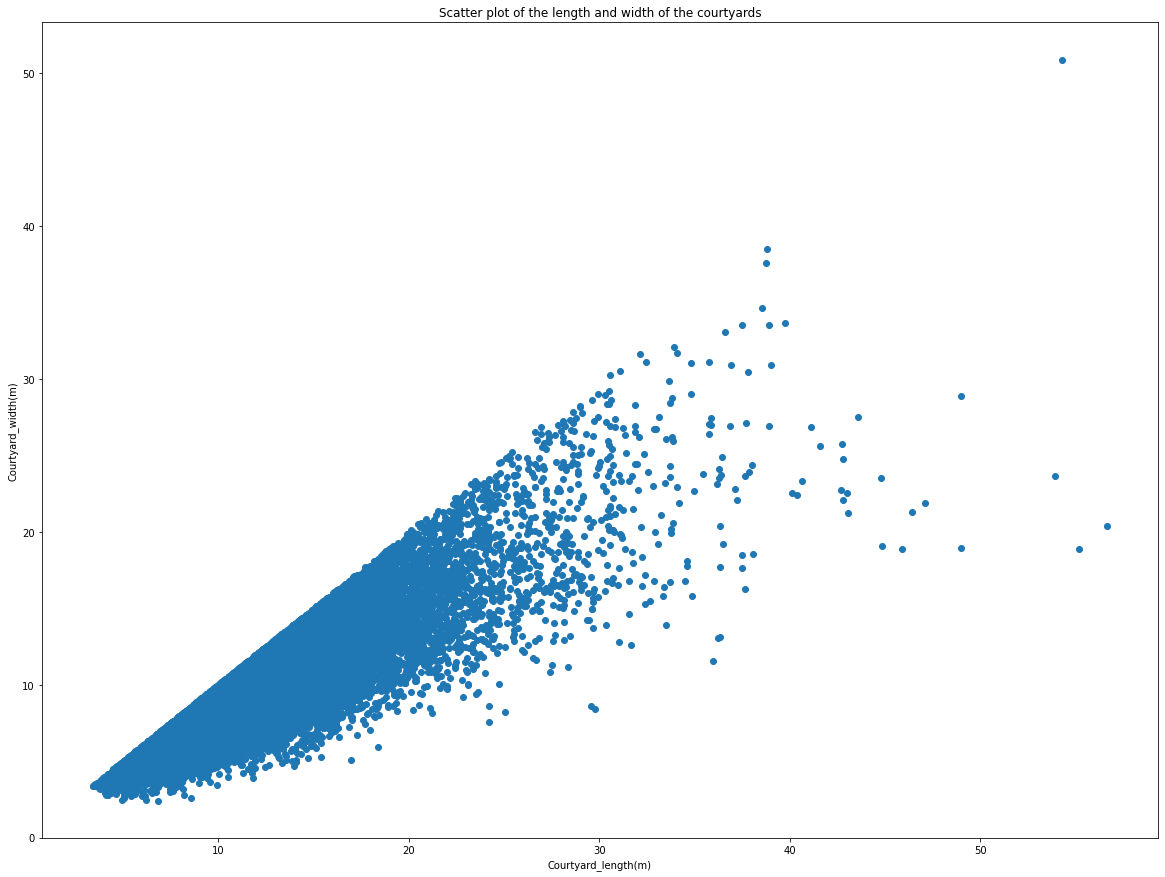

In [12]:
plt.figure(figsize=[20,15])
plt.scatter(df_2['Courtyard_length(m)'], df_2['Courtyard_width(m)'])
plt.xlabel('Courtyard_length(m)')
plt.ylabel('Courtyard_width(m)')
plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

In [13]:
df_2.corr()

Courtyard_area(m2)  Water_place_area(m2)  \
Courtyard_area(m2)                      1.000000              0.750708   
Water_place_area(m2)                    0.750708              1.000000   
Green_area(m2)                          0.573518              0.316832   
Courtyard_length(m)                     0.928709              0.684449   
Courtyard_width(m)                      0.922305              0.673859   
...                                          ...                   ...   
Water_place/House_area_Ratio            0.403486              0.717186   
Green/House_area_Ratio                  0.194316              0.024820   
Courtyard_Ratio                         0.038430              0.041757   
House_Ratio                             0.020322              0.021837   
Water_place_Ratio                       0.022173             -0.103321   

                              Green_area(m2)  Courtyard_length(m)  \
Courtyard_area(m2)                  0.573518             0.928709   
Water_place_area(m2)                0.316832             0.684449   
Green_area(m2)                      1.000000             0.524510   
Courtyard_length(m)                 0.524510             1.000000   
Courtyard_width(m)                  0.524216             0.877552   
...                                      ...                  ...   
Water_place/House_area_Ratio        0.096737             0.394852   
Green/House_area_Ratio              0.701895             0.207216   
Courtyard_Ratio                     0.021521             0.263095   
House_Ratio                        -0.028676             0.023444   
Water_place_Ratio                   0.080650             0.056137   

                              Courtyard_width(m)  Courtyard_direction(deg)  \
Courtyard_area(m2)                      0.922305                 -0.033648   
Water_place_area(m2)                    0.673859                 -0.034679   
Green_area(m2)                          0.524216                  0.001692   
Courtyard_length(m)                     0.877552                 -0.036630   
Courtyard_width(m)                      1.000000                 -0.044094   
...                                          ...                       ...   
Water_place/House_area_Ratio            0.391978                 -0.001667   
Green/House_area_Ratio                  0.201022                  0.017979   
Courtyard_Ratio                        -0.192645                  0.004587   
House_Ratio                             0.020251                 -0.020765   
Water_place_Ratio                      -0.019781                 -0.007263   

                              Water_place_length(m)  Water_place_width(m)  \
Courtyard_area(m2)                         0.667267              0.635123   
Water_place_area(m2)                       0.894482              0.898144   
Green_area(m2)                             0.229901              0.196742   
Courtyard_length(m)                        0.670793              0.607094   
Courtyard_width(m)                         0.649512              0.648052   
...                                             ...                   ...   
Water_place/House_area_Ratio               0.717930              0.740336   
Green/House_area_Ratio                    -0.015592             -0.043876   
Courtyard_Ratio                            0.063618             -0.039936   
House_Ratio                                0.033748              0.033074   
Water_place_Ratio                          0.036171             -0.295337   

                              Water_place_direction(deg)  House_area(m2)  ...  \
Courtyard_area(m2)                             -0.004323        0.228980  ...   
Water_place_area(m2)                           -0.003730        0.170584  ...   
Green_area(m2)                                  0.013134        0.119204  ...   
Courtyard_length(m)                            -0.001052        0.219533  ...   
Courtyard_width(m)                           

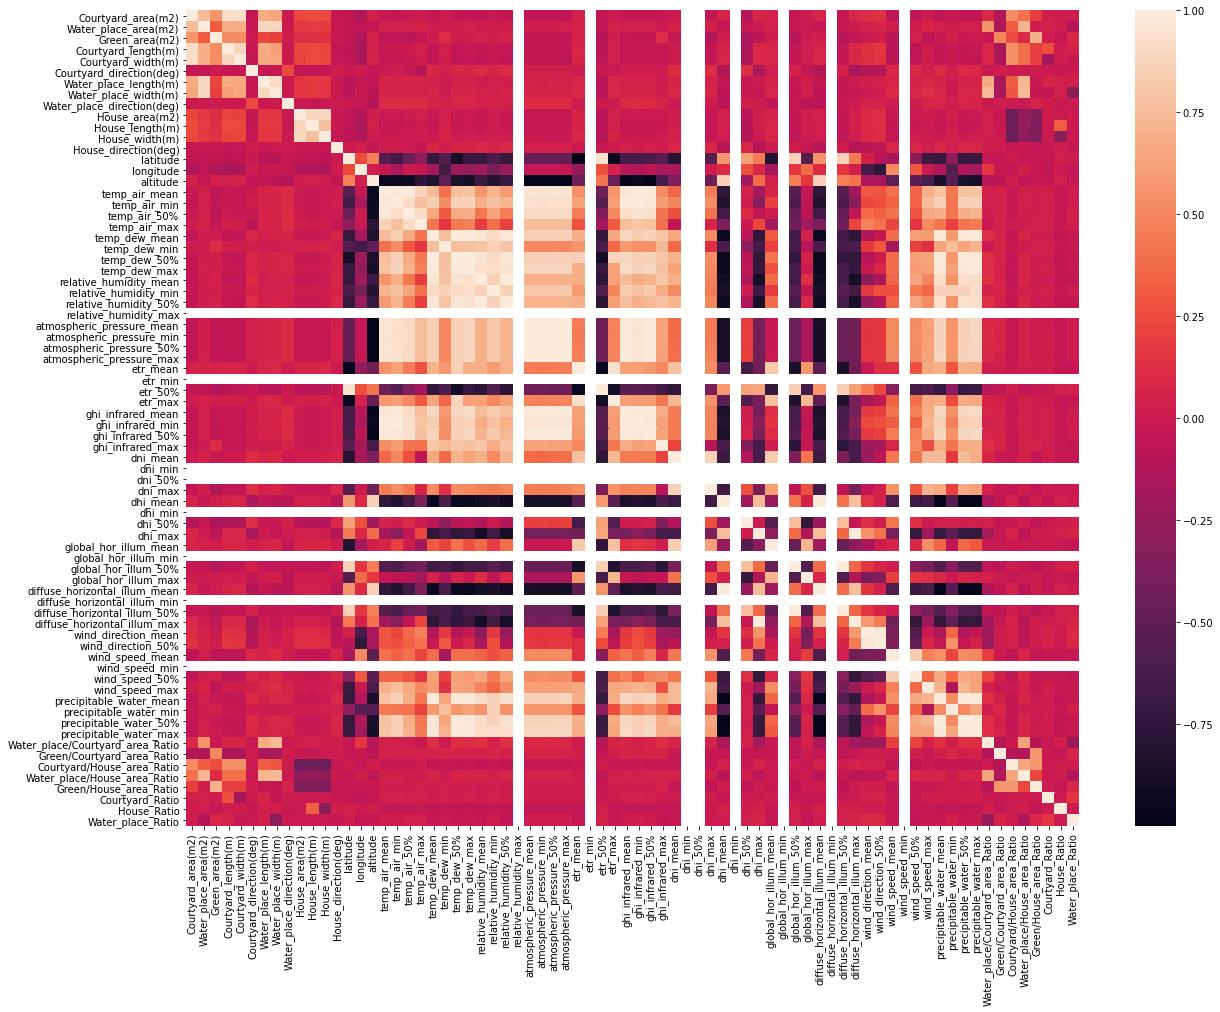

In [14]:
plt.figure(figsize=[20,15])
sb.heatmap(df_2.corr())
plt.show()

In [15]:
df_geometric = df_2.drop(['temp_air_mean', 'temp_air_min', 'temp_air_50%', 'temp_air_max',
       'temp_dew_mean', 'temp_dew_min', 'temp_dew_50%', 'temp_dew_max',
       'relative_humidity_mean', 'relative_humidity_min',
       'relative_humidity_50%', 'relative_humidity_max',
       'atmospheric_pressure_mean', 'atmospheric_pressure_min',
       'atmospheric_pressure_50%', 'atmospheric_pressure_max', 'etr_mean',
       'etr_min', 'etr_50%', 'etr_max', 'ghi_infrared_mean',
       'ghi_infrared_min', 'ghi_infrared_50%', 'ghi_infrared_max', 'dni_mean',
       'dni_min', 'dni_50%', 'dni_max', 'dhi_mean', 'dhi_min', 'dhi_50%',
       'dhi_max', 'global_hor_illum_mean', 'global_hor_illum_min',
       'global_hor_illum_50%', 'global_hor_illum_max',
       'diffuse_horizontal_illum_mean', 'diffuse_horizontal_illum_min',
       'diffuse_horizontal_illum_50%', 'diffuse_horizontal_illum_max',
       'wind_direction_mean', 'wind_direction_50%', 'wind_speed_mean',
       'wind_speed_min', 'wind_speed_50%', 'wind_speed_max',
       'precipitable_water_mean', 'precipitable_water_min',
       'precipitable_water_50%', 'precipitable_water_max'], axis=1)
df_geometric

Courtyard_ID  Courtyard_area(m2)  Water_place_area(m2)  \
0        R8-0460_44_1          152.730000            140.585630   
1       R8-0462_85_34          110.342810             17.673750   
2       R8-0460_20_11          144.632810             23.239687   
3        R7-0383_90_0          352.698760              2.368125   
4       R8-0460_90_54           31.750313              2.252812   
...               ...                 ...                   ...   
26496  1534-R11_74_12           81.659160              1.998757   
26497   1534-R11_13_1           99.179150             13.847627   
26498  1423-R10_41_18           71.264620                   NaN   
26499   1534-R11_52_4           90.899315             33.615910   
26500   1176-R9_24_12           49.023724             18.369404   

       Green_area(m2)  Courtyard_length(m)  Courtyard_width(m)  \
0                 NaN            15.578903           12.804945   
1                 NaN            12.082839           10.959833   
2                 NaN            15.189007           10.724132   
3            5.231250            25.977950           15.669677   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
26496             NaN            12.213982            8.980868   
26497             NaN            11.495475            9.786368   
26498             NaN            12.063013            8.047819   
26499             NaN            10.811145            9.532684   
26500        2.092015             8.003519            6.653075   

       Courtyard_direction(deg)  Water_place_length(m)  Water_place_width(m)  \
0                     167.40598                    NaN                   NaN   
1                     168.46596               5.397809              5.201525   
2                     261.34380               6.129715              4.646221   
3                     184.34330               2.250000              1.425000   
4                           NaN               1.879133              1.685361   
...                         ...                    ...                   ...   
26496                 233.03494               2.984704              0.984317   
26497                 149.74478               6.165046              3.504007   
26498                 206.60252                    NaN                   NaN   
26499                 143.39989                    NaN                   NaN   
26500                 118.52754                    NaN                   NaN   

       Water_place_direction(deg)  ...  longitude  altitude  \
0                             NaN  ...     52.667    2004.0   
1                       268.75100  ...     52.667    2004.0   
2                       258.81460  ...     52.667    2004.0   
3                        94.76000  ...     52.667    2004.0   
4                             NaN  ...     52.667    2004.0   
...                           ...  ...        ...       ...   
26496                   241.16505  ...     54.277    1235.7   
26497                   167.69084  ...     54.277    1235.7   
26498                         NaN  ...     54.277    1235.7   
26499                         NaN  ...     54.277    1235.7   
26500                         NaN  ...     54.277    1235.7   

       Water_place/Courtyard_area_Ratio  Green/Courtyard_area_Ratio  \
0                              0.920485                         NaN   
1                              0.160171                         NaN   
2                              0.160681                         NaN   
3                              0.006714                    0.014832   
4                              0.070954                         NaN   
...                                 ...                         ...   
26496                          0.024477                         NaN   
26497                          0.139622                         NaN   
26498                               NaN               

In [9]:
df_2

Unnamed: 0    Courtyard_ID  Courtyard_area(m2)  Water_place_area(m2)  \
0               0    R8-0460_44_1          152.730000            140.585630   
1               1   R8-0462_85_34          110.342810             17.673750   
2               2   R8-0460_20_11          144.632810             23.239687   
3               3    R7-0383_90_0          352.698760              2.368125   
4               4   R8-0460_90_54           31.750313              2.252812   
...           ...             ...                 ...                   ...   
26496       26496  1534-R11_74_12           81.659160              1.998757   
26497       26497   1534-R11_13_1           99.179150             13.847627   
26498       26498  1423-R10_41_18           71.264620                   NaN   
26499       26499   1534-R11_52_4           90.899315             33.615910   
26500       26500   1176-R9_24_12           49.023724             18.369404   

       Green_area(m2)  Courtyard_length(m)  Courtyard_width(m)  \
0                 NaN            15.578903           12.804945   
1                 NaN            12.082839           10.959833   
2                 NaN            15.189007           10.724132   
3            5.231250            25.977950           15.669677   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
26496             NaN            12.213982            8.980868   
26497             NaN            11.495475            9.786368   
26498             NaN            12.063013            8.047819   
26499             NaN            10.811145            9.532684   
26500        2.092015             8.003519            6.653075   

       Courtyard_direction(deg)  Water_place_length(m)  Water_place_width(m)  \
0                     167.40598                    NaN                   NaN   
1                     168.46596               5.397809              5.201525   
2                     261.34380               6.129715              4.646221   
3                     184.34330               2.250000              1.425000   
4                           NaN               1.879133              1.685361   
...                         ...                    ...                   ...   
26496                 233.03494               2.984704              0.984317   
26497                 149.74478               6.165046              3.504007   
26498                 206.60252                    NaN                   NaN   
26499                 143.39989                    NaN                   NaN   
26500                 118.52754                    NaN                   NaN   

       ...  precipitable_water_50%  precipitable_water_max  \
0      ...                     6.0                    29.0   
1      ...                     6.0                    29.0   
2      ...                     6.0                    29.0   
3      ...                     6.0                    29.0   
4      ...                     6.0                    29.0   
...    ...                     ...                     ...   
26496  ...                     6.0                    35.0   
26497  ...                     6.0                    35.0   
26498  ...                     6.0                    35.0   
26499  ...                     6.0                    35.0   
26500  ...                     6.0                    35.0   

       Water_place/Courtyard_area_Ratio  Green/Courtyard_area_Ratio  \
0                              0.920485                         NaN   
1                              0.160171                         NaN   
2                              0.160681                         NaN   
3                              0.006714                    0.014832   
4                              0.070954                         NaN   
...                                 ...                         ...   
26496                          0.024477                       

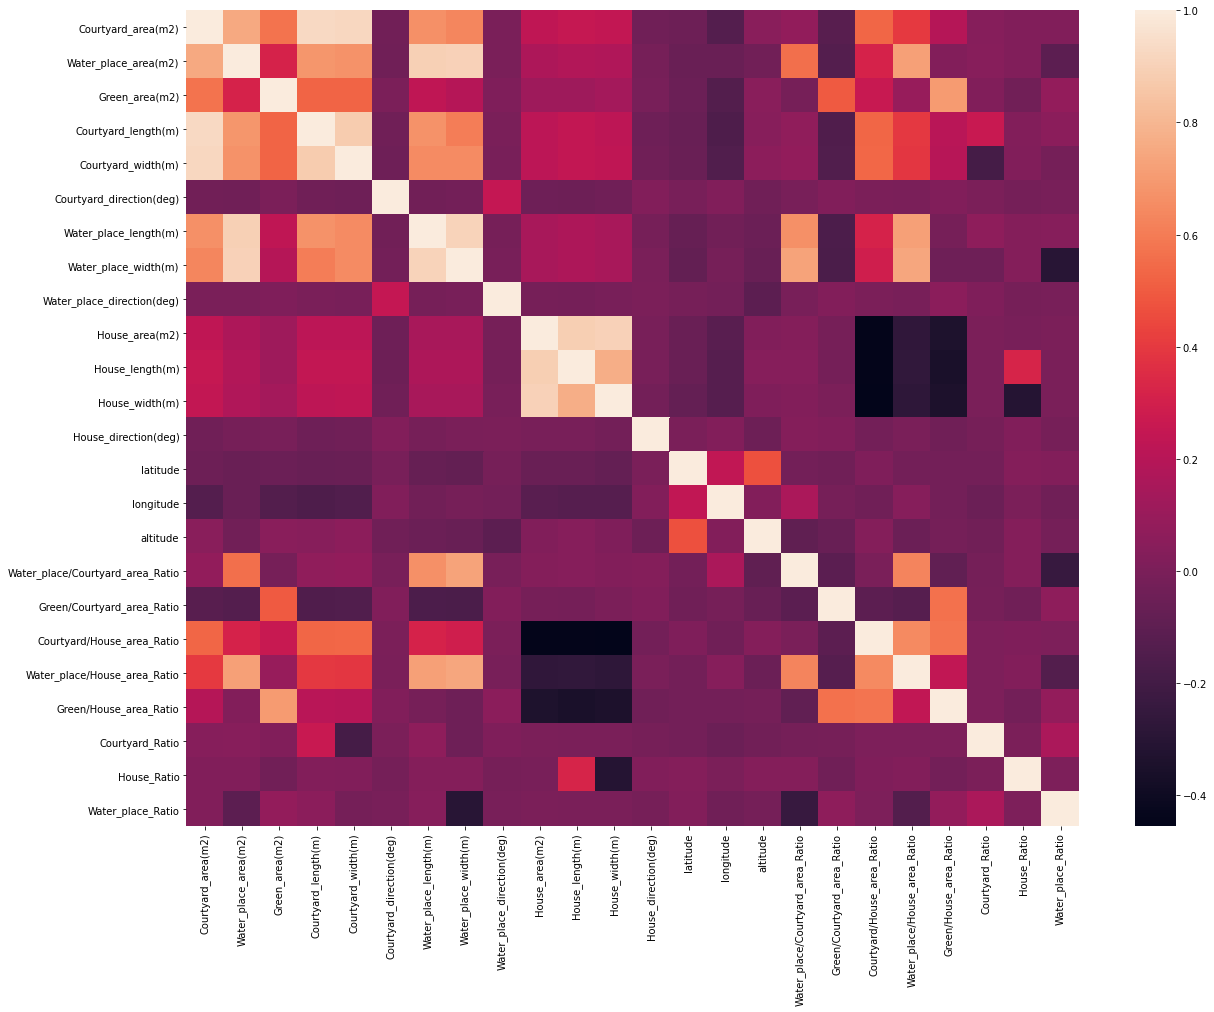

In [16]:
plt.figure(figsize=[20,15])
sb.heatmap(df_geometric.corr())
plt.show()

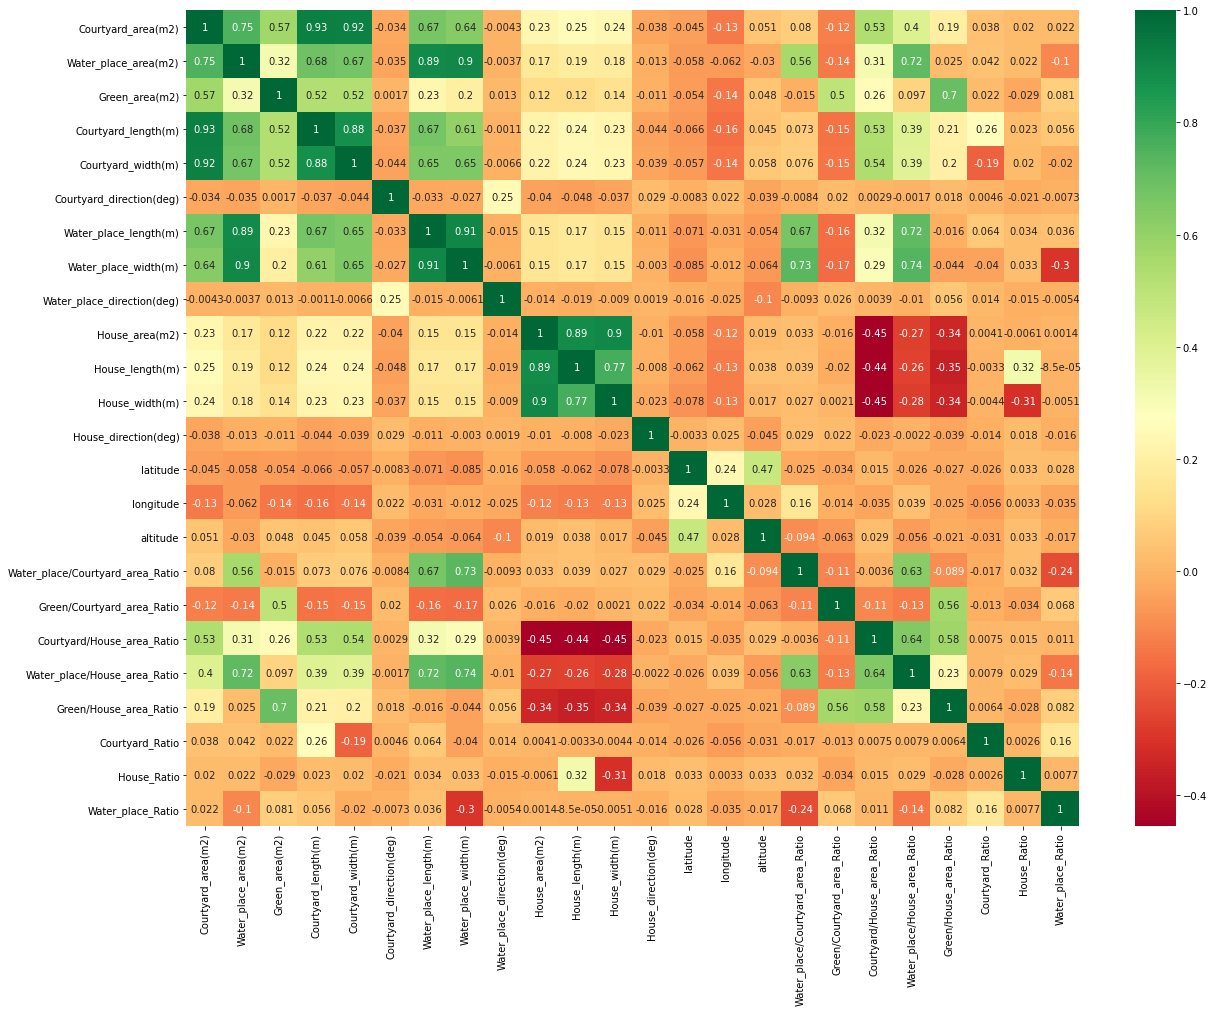

In [10]:
plt.figure(figsize=[20,15])
sb.heatmap(df_geometric.corr(), annot=True, cmap='RdYlGn')
plt.show()

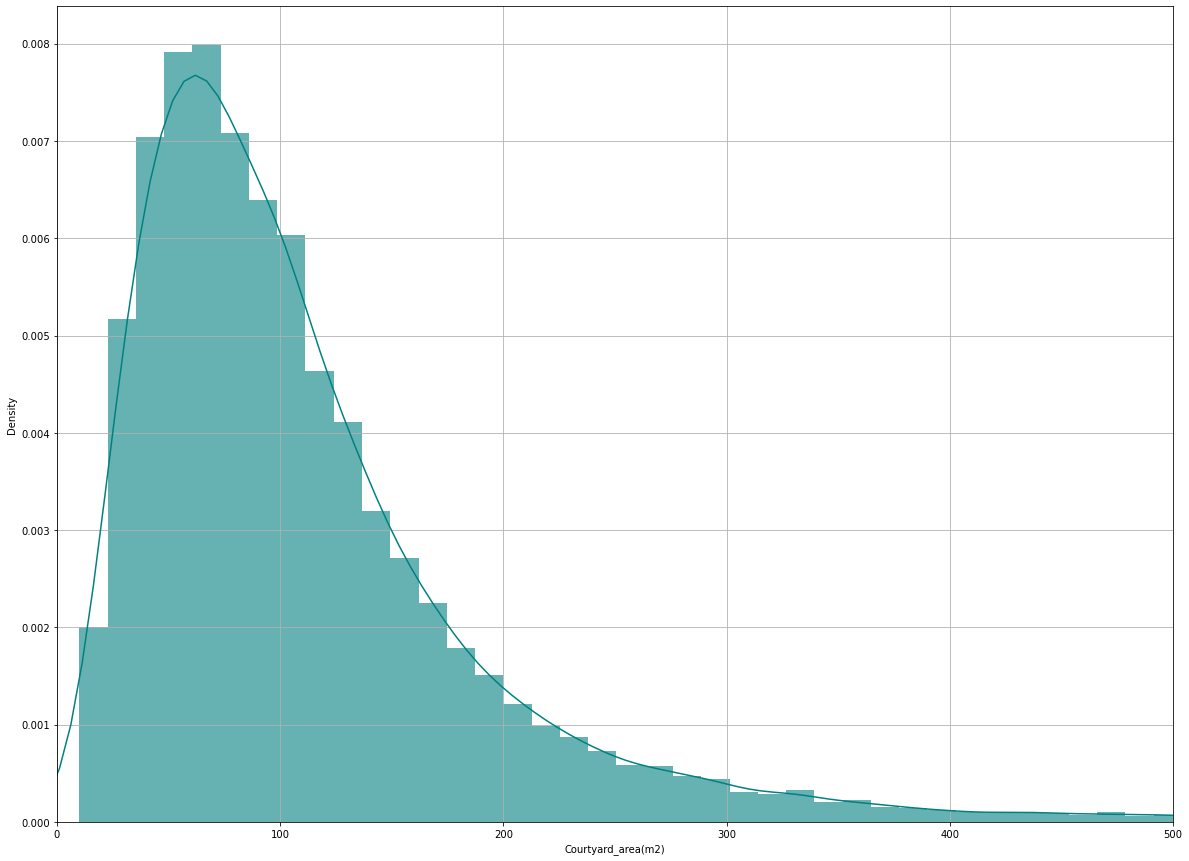

In [18]:
ax = df_2['Courtyard_area(m2)'].hist(bins=200, density=True, stacked= True, color= 'teal', alpha=0.6, figsize=[20,15])
df_2['Courtyard_area(m2)'].plot(kind= 'density', color='teal')
ax.set(xlabel='Courtyard_area(m2)')
plt.xlim(0,500)
plt.grid()
plt.show()

In [19]:
df_geometric.describe()

Courtyard_area(m2)  Water_place_area(m2)  Green_area(m2)  \
count        26501.000000          20070.000000     6069.000000   
mean           114.550158             39.582456        5.886221   
std             96.127625             51.646673        6.697535   
min             10.019700              0.015606        1.000638   
25%             56.938950             12.007561        2.404557   
50%             90.338900             25.000181        3.939637   
75%            139.772520             47.470244        6.887790   
max           2543.324000           1105.880600      193.990110   

       Courtyard_length(m)  Courtyard_width(m)  Courtyard_direction(deg)  \
count         26437.000000        26437.000000              24315.000000   
mean             12.210278            9.726029                180.289560   
std               4.701648            3.630134                 54.405934   
min               3.394888            2.413937                 90.017780   
25%               9.029873            7.205521                126.335700   
50%              11.443449            9.135000                182.760180   
75%              14.339438           11.541655                223.209610   
max              56.664080           50.884040                269.997960   

       Water_place_length(m)  Water_place_width(m)  \
count           11732.000000          11327.000000   
mean                6.837758              5.188974   
std                 4.133827              3.117239   
min                 0.045000              0.102000   
25%                 4.050000              3.018683   
50%                 6.131478              4.575000   
75%                 8.723037              6.646534   
max                38.905990             30.336400   

       Water_place_direction(deg)  House_area(m2)  ...     longitude  \
count                10600.000000    21361.000000  ...  26501.000000   
mean                   175.591939      407.591842  ...     53.888502   
std                     53.893096      306.080892  ...      1.931238   
min                     90.052150       17.431778  ...     50.835000   
25%                    125.361616      215.190200  ...     52.589000   
50%                    179.861880      325.661200  ...     54.277000   
75%                    216.450000      500.289340  ...     54.277000   
max                    269.992340     5089.113000  ...     59.266000   

           altitude  Water_place/Courtyard_area_Ratio  \
count  26501.000000                      20070.000000   
mean    1269.693540                          0.305871   
std      504.070412                          0.203643   
min       20.400000                          0.000495   
25%     1235.700000                          0.142001   
50%     1235.700000                          0.266059   
75%     1509.400000                          0.439070   
max     2004.000000                          0.998389   

       Green/Courtyard_area_Ratio  Courtyard/House_area_Ratio  \
count                 6069.000000                21361.000000   
mean                     0.047375                    0.321741   
std                      0.038778                    0.221944   
min                      0.004034                    0.008933   
25%                      0.025531                    0.151111   
50%                      0.038665                    0.262481   
75%                      0.059331                    0.441500   
max                      0.935626                    0.999898   

       Water_place/House_area_Ratio  Green/House_area_Ratio  Courtyard_Ratio  \
count                  15948.000000             4680.000000     26011.000000   
mean                       0.103885                0.017139         1.273020   
std                        0.107375                0.016687         0.242745   
min                        0.000049                0.000667         1.000000   
25%                        0.031048                0.006698         1.091106   
50

In [20]:
cities = ['Abarkooh', 'Birjand', 'Bushehr', 'Esfehan', 'Kong', 'Meybod', 'Semnan', 'Shiraz', 'Yazd']
Courtyard_Ratio_mean = []
for i in cities:
    Courtyard_Ratio_mean.append(df_2[df_2.City == i].describe()['Courtyard_Ratio']['mean'])

In [21]:
cities = ['Abarkooh', 'Birjand', 'Bushehr', 'Esfehan', 'Kong', 'Meybod', 'Semnan', 'Shiraz', 'Yazd']
Courtyard_direction_mean = []
for i in cities:
    Courtyard_direction_mean.append(df_2[df_2.City == i].describe()['Courtyard_direction(deg)']['mean'])

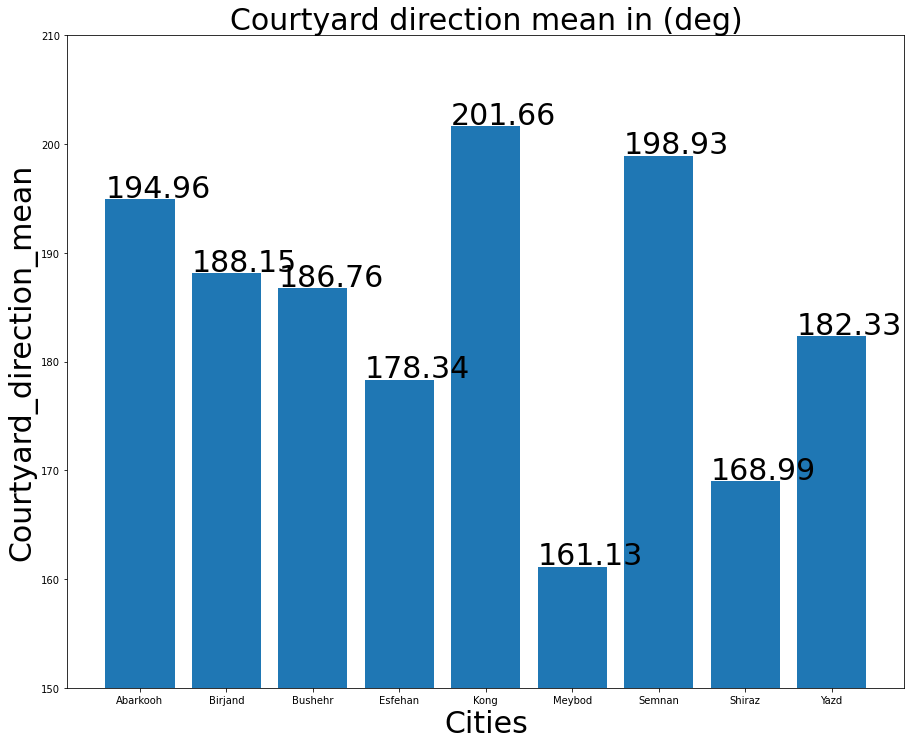

In [3]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Courtyard_direction(deg)'])

plt.xlabel('Cities', fontdict=dict(fontsize=30))
plt.ylabel('Courtyard_direction_mean', fontdict=dict(fontsize=30))
for index,data in enumerate(df_cities.loc[:,'Courtyard_direction(deg)']):
    plt.text(x=index-0.4, y =data+ 0.2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(150,210)

plt.title('Courtyard direction mean in (deg)', fontdict=dict(fontsize=30))
plt.show()

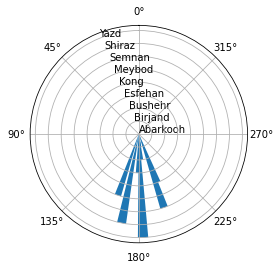

In [45]:
from math import radians
angle = [radians(a) for a in df_cities['Courtyard_direction(deg)']]

plt.clf()
sp = plt.subplot(1, 1, 1, projection='polar')

sp.set_theta_zero_location('N')
#sp.set_theta_direction(-1)
plt.bar(angle, df_cities.index, width=0.1)
plt.show()



In [24]:
cities = ['Abarkooh', 'Birjand', 'Bushehr', 'Esfehan', 'Kong', 'Meybod', 'Semnan', 'Shiraz', 'Yazd']
data_cities = []
for i in cities:
    data_cities.append(df_2[df_2.City == i].describe().loc['mean',:])

In [25]:
df_cities = pd.DataFrame(data_cities, index= cities, columns= df_2.columns)

In [5]:
df_cities

Courtyard_ID  Courtyard_area(m2)  Water_place_area(m2)  \
Abarkooh           NaN          114.691605             38.066953   
Birjand            NaN           74.928194             28.707583   
Bushehr            NaN          110.585492             42.797998   
Esfehan            NaN          149.385450             50.992475   
Kong               NaN           95.381431             47.384959   
Meybod             NaN          159.637584             60.005758   
Semnan             NaN           70.530681             24.259950   
Shiraz             NaN          127.754209             37.937838   
Yazd               NaN           85.531250             18.093479   

          Green_area(m2)  Courtyard_length(m)  Courtyard_width(m)  \
Abarkooh        5.021152            12.169598            9.740577   
Birjand         4.738392             9.882008            8.127391   
Bushehr         7.504006            12.187211            9.577689   
Esfehan         8.237395            14.089294           11.248723   
Kong            4.107638            11.306039            8.951395   
Meybod          5.801478            14.763235           11.724951   
Semnan          3.578435             9.667561            7.702958   
Shiraz          8.069153            13.000899           10.290829   
Yazd            5.041247            10.543149            8.382311   

          Courtyard_direction(deg)  Water_place_length(m)  \
Abarkooh                194.958023               6.555345   
Birjand                 188.147003               6.219359   
Bushehr                 186.759750               7.067592   
Esfehan                 178.339666               7.751734   
Kong                    201.660246               7.758537   
Meybod                  161.125446               9.161152   
Semnan                  198.926496               5.297636   
Shiraz                  168.993053               6.481360   
Yazd                    182.328498               4.638330   

          Water_place_width(m)  Water_place_direction(deg)  ...  \
Abarkooh              5.039515                  163.011720  ...   
Birjand               4.900641                  165.891675  ...   
Bushehr               5.192849                  180.943580  ...   
Esfehan               5.900736                  174.277341  ...   
Kong                  6.299903                  186.679303  ...   
Meybod                6.804076                  170.896068  ...   
Semnan                4.087341                  188.975946  ...   
Shiraz                4.876230                  175.137949  ...   
Yazd                  3.379378                  187.205038  ...   

          precipitable_water_50%  precipitable_water_max  \
Abarkooh                     6.0                    29.0   
Birjand                      6.0                    31.0   
Bushehr                     54.0                   212.0   
Esfehan                      7.0                    37.0   
Kong                        71.0                   210.0   
Meybod                       6.0                    35.0   
Semnan                       9.0                    43.0   
Shiraz                      10.0                    46.0   
Yazd                         6.0                    35.0   

          Water_place/Courtyard_area_Ratio  Green/Courtyard_area_Ratio  \
Abarkooh                          0.275837                    0.038539   
Birjand                           0.421449                    0.050012   
Bushehr                           0.320458                    0.064197   
Esfehan                           0.319381                    0.046902   
Kong                              0.420965                    0.046825   
Meybod                            0.345018                    0.038265   
Semnan                            0.322859                    0.045431   
Shiraz                            0.276020                    0.050191   
Yazd                              0.184420                    0.050426   

          Cour

In [27]:
df_cities.to_csv('dataset_cities.csv')

In [28]:
#-------------------------------------------

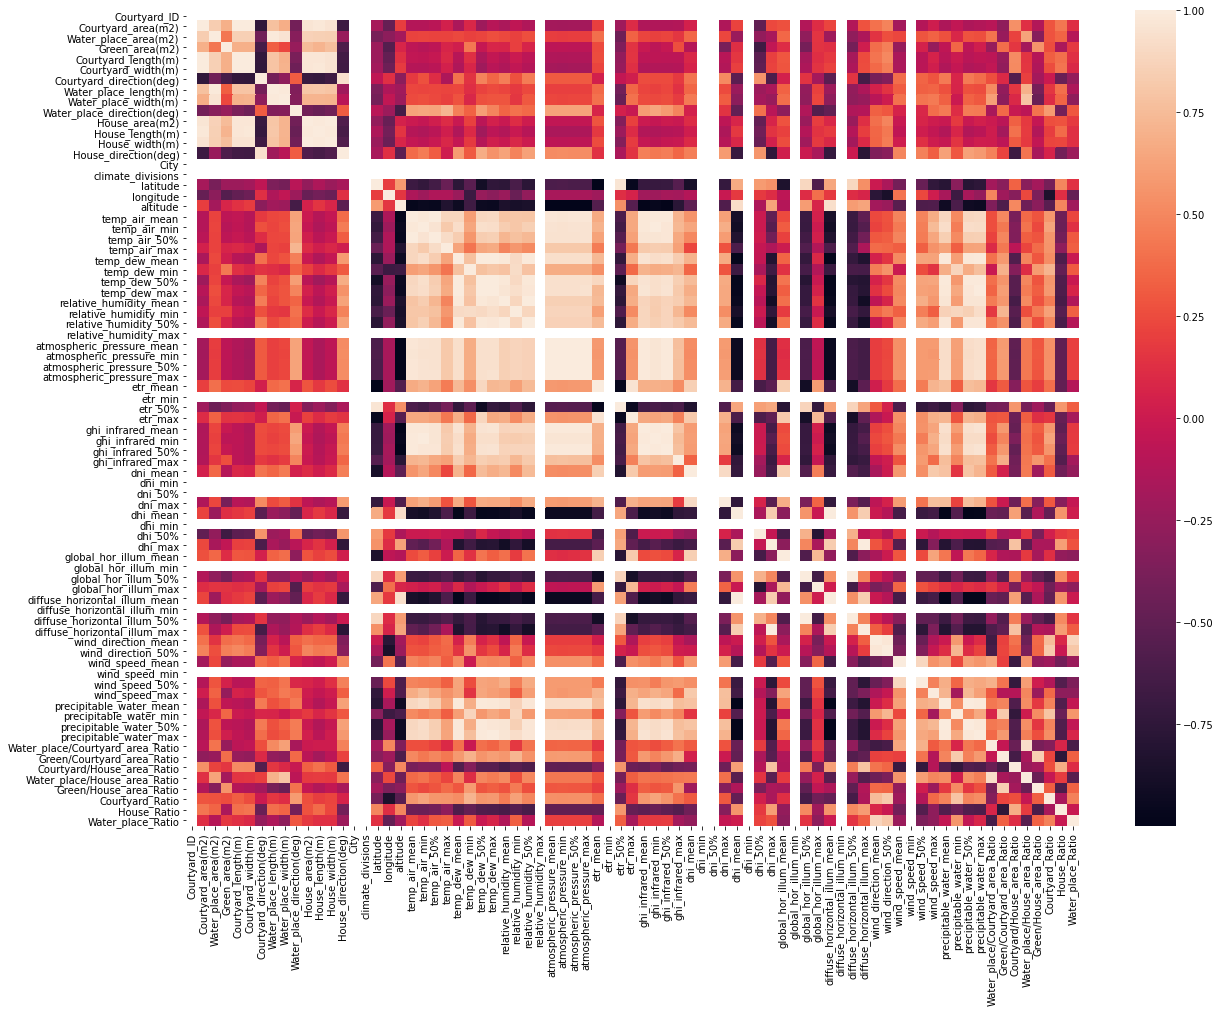

In [29]:
plt.figure(figsize=[20,15])
sb.heatmap(df_cities.corr())
plt.show()

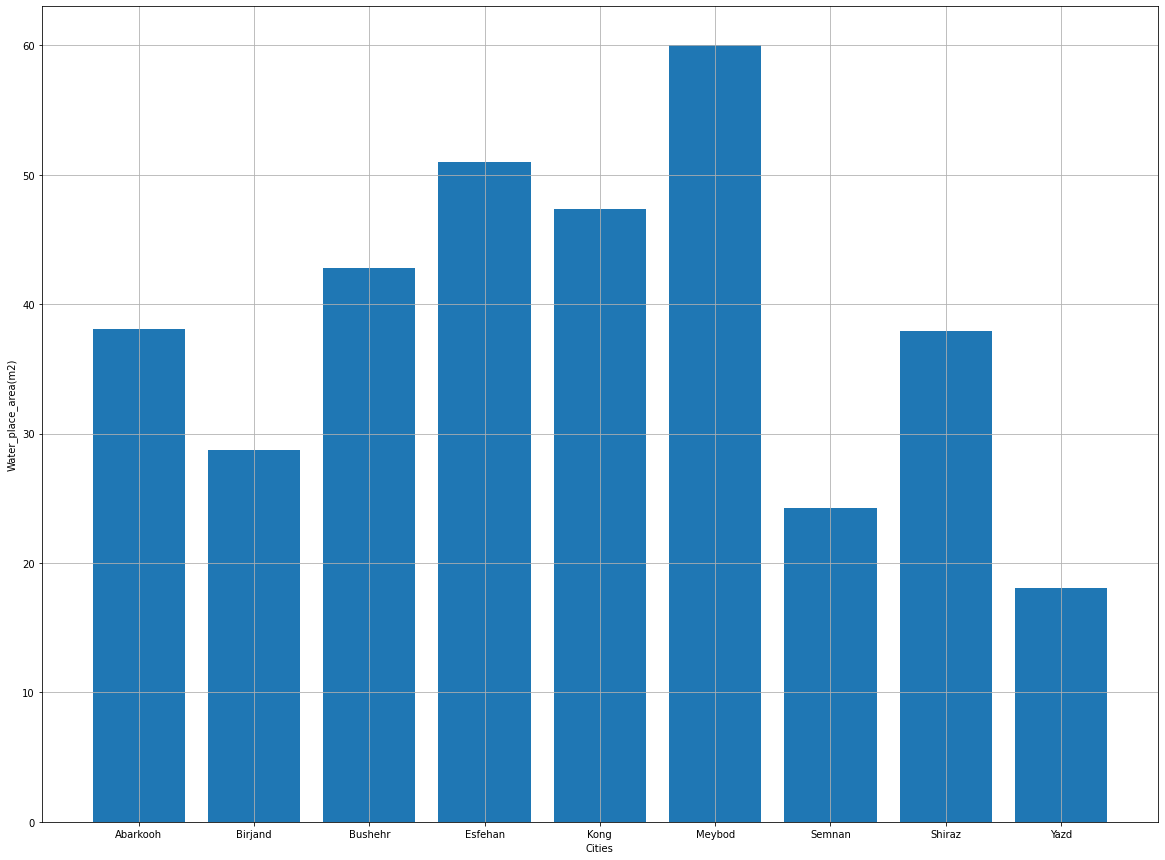

In [30]:
plt.figure(figsize=[20,15])
plt.bar(df_cities.index, df_cities['Water_place_area(m2)'])
plt.xlabel('Cities')
plt.ylabel('Water_place_area(m2)')
# plt.ylim(150,220,5)
plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

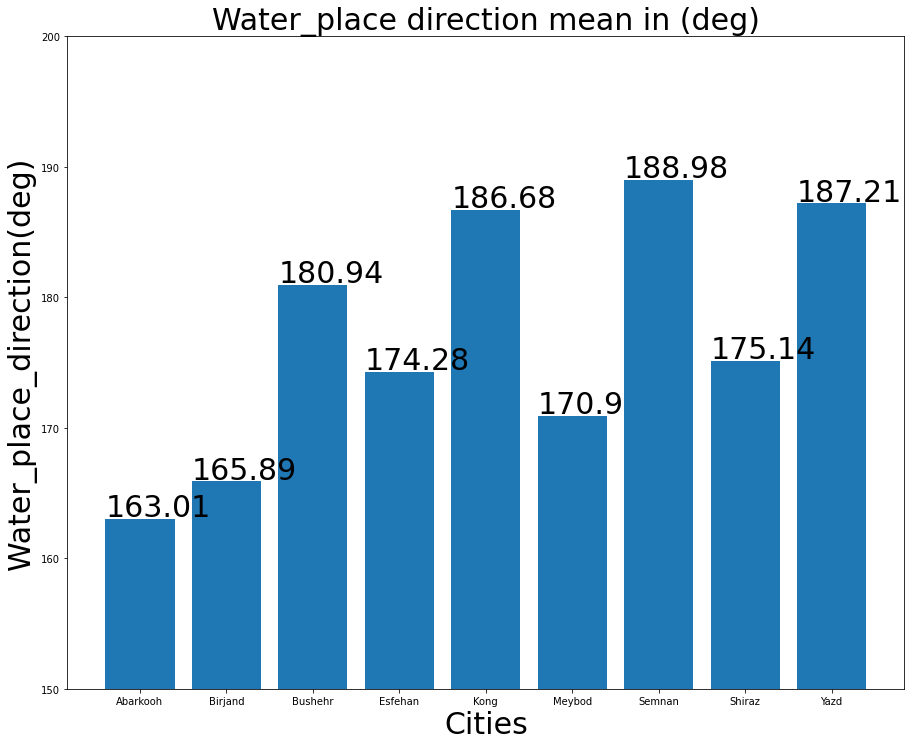

In [4]:

plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Water_place_direction(deg)'])

plt.xlabel('Cities', fontdict=dict(fontsize=30))
plt.ylabel('Water_place_direction(deg)', fontdict=dict(fontsize=30))
for index,data in enumerate(df_cities.loc[:,'Water_place_direction(deg)']):
    plt.text(x=index-0.4, y =data+ 0.2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(150,200)

plt.title('Water_place direction mean in (deg)', fontdict=dict(fontsize=30))
plt.show()

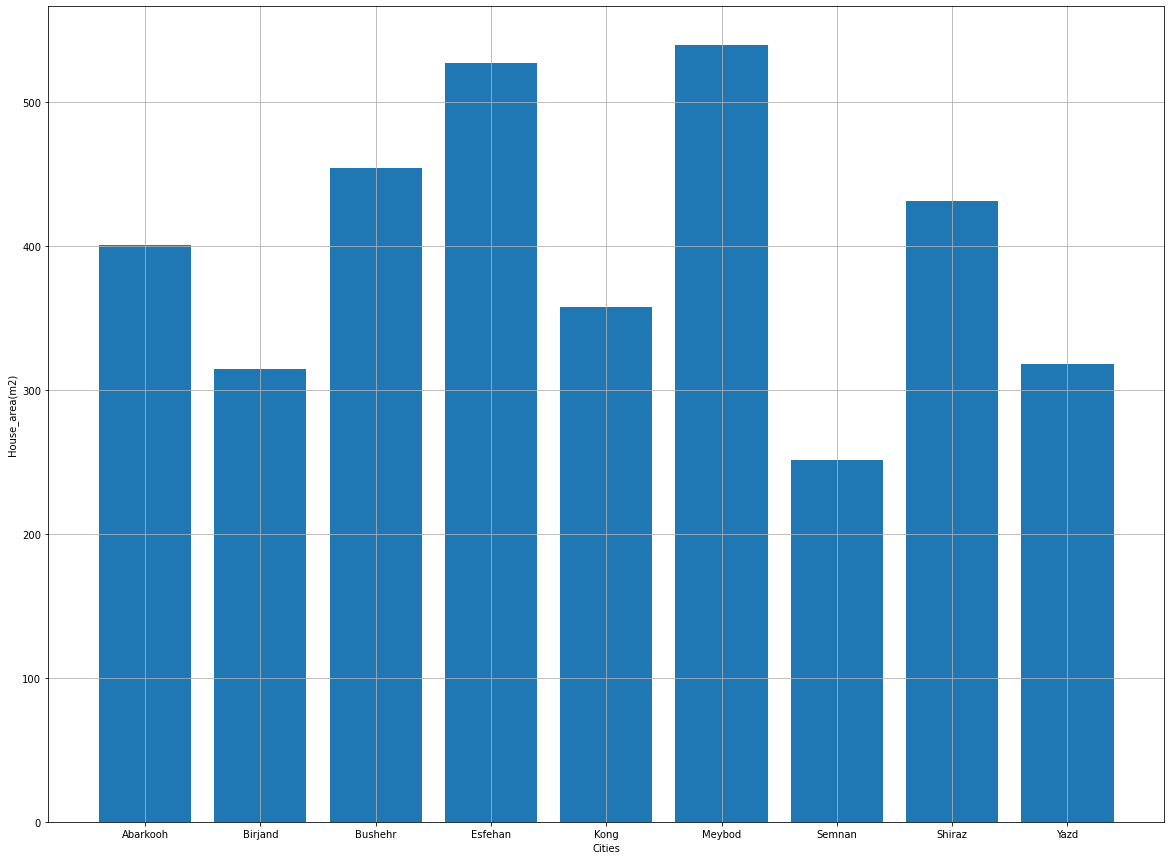

In [32]:
plt.figure(figsize=[20,15])
plt.bar(df_cities.index, df_cities['House_area(m2)'])
plt.xlabel('Cities')
plt.ylabel('House_area(m2)')
# plt.ylim(150,200)
plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

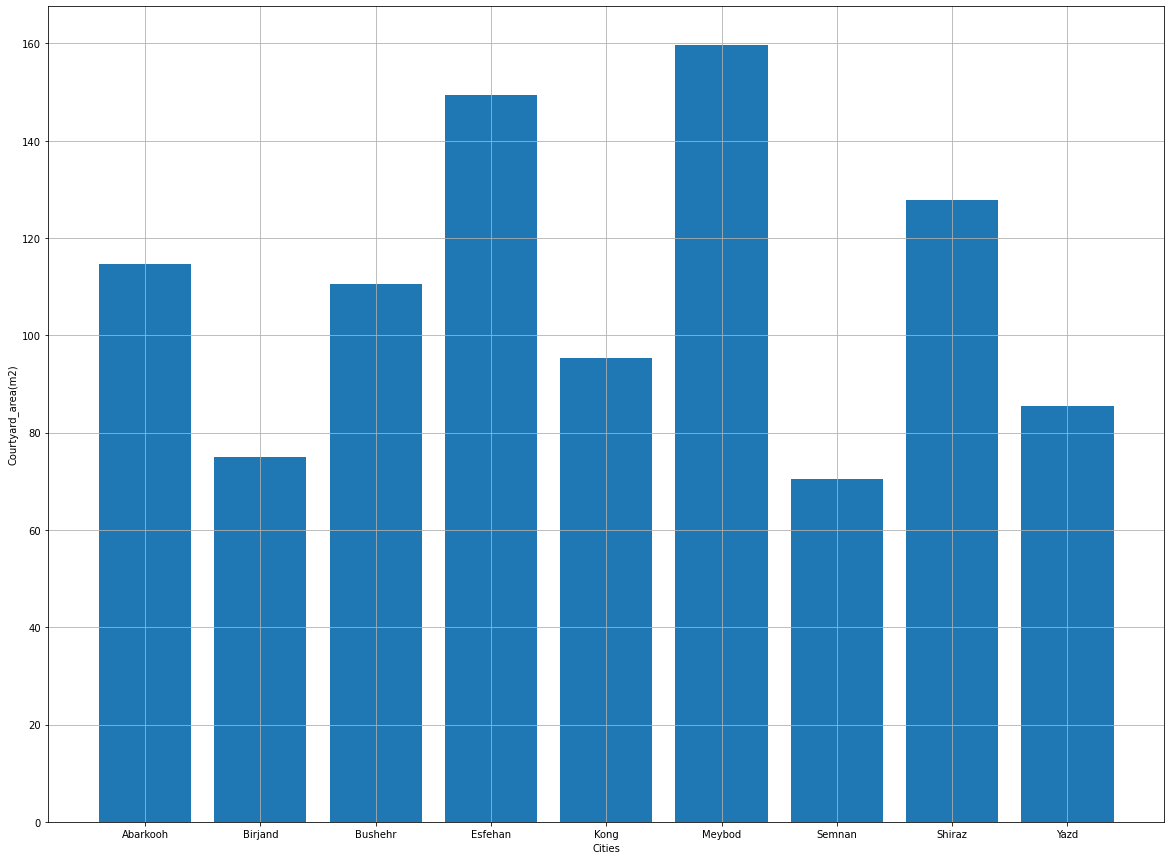

In [33]:
plt.figure(figsize=[20,15])
plt.bar(df_cities.index, df_cities['Courtyard_area(m2)'])
plt.xlabel('Cities')
plt.ylabel('Courtyard_area(m2)')
# plt.ylim(150,200)
plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

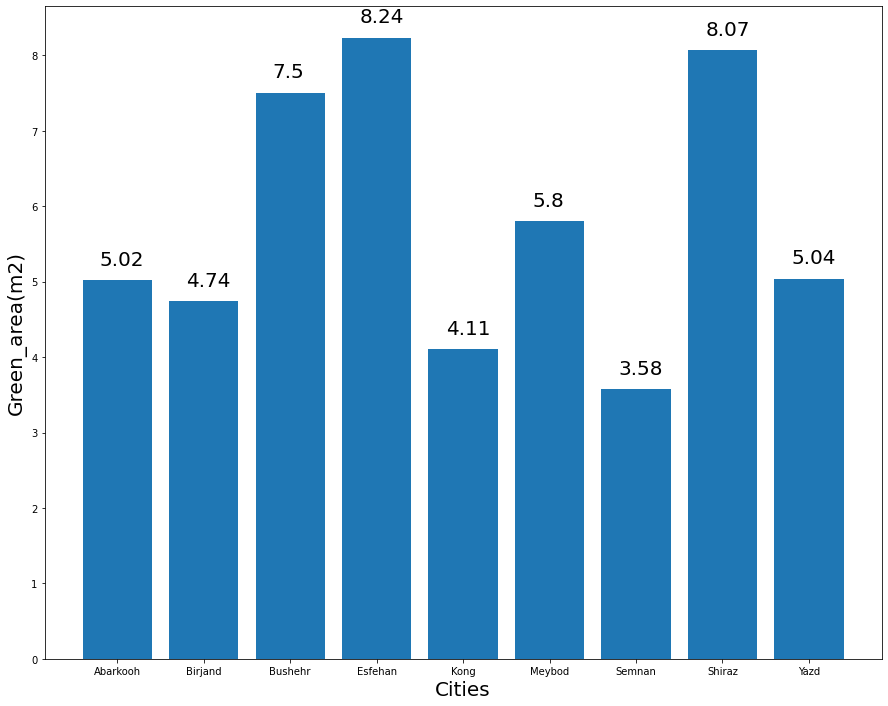

In [14]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Green_area(m2)'])
plt.xlabel('Cities', fontdict=dict(fontsize=20))
plt.ylabel('Green_area(m2)', fontdict=dict(fontsize=20))
for index,data in enumerate(df_cities.loc[:,'Green_area(m2)']):
    plt.text(x=index-0.2, y =data+ 0.2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=20))

# plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

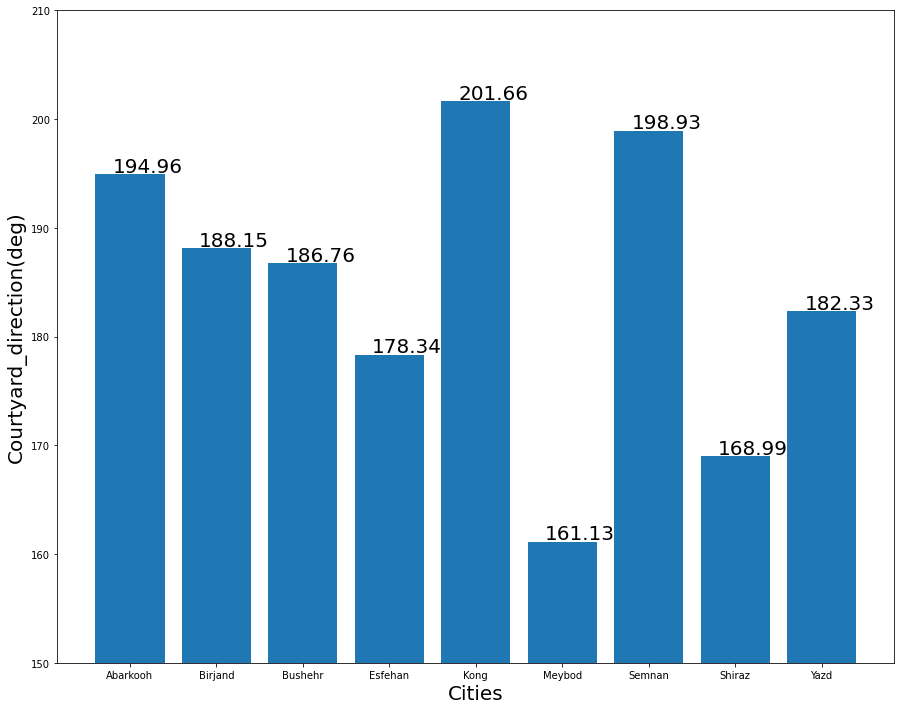

In [49]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Courtyard_direction(deg)'])
plt.xlabel('Cities', fontdict=dict(fontsize=20))
plt.ylabel('Courtyard_direction(deg)', fontdict=dict(fontsize=20))
for index,data in enumerate(df_cities.loc[:,'Courtyard_direction(deg)']):
    plt.text(x=index-0.2, y =data+ 0.2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=20))
plt.ylim(150,210)
# plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

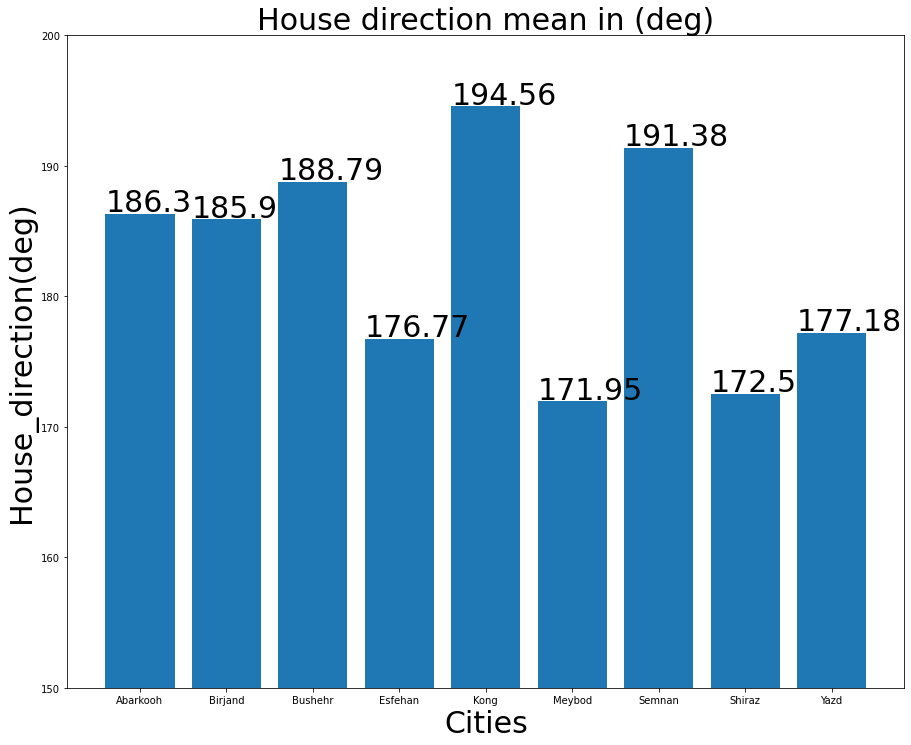

In [51]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['House_direction(deg)'])
plt.xlabel('Cities', fontdict=dict(fontsize=30))
plt.ylabel('House_direction(deg)', fontdict=dict(fontsize=30))
for index,data in enumerate(df_cities.loc[:,'House_direction(deg)']):
    plt.text(x=index-0.4, y =data+ 0.2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(150,200)
# plt.grid()
plt.title('House direction mean in (deg)', fontdict=dict(fontsize=30))
plt.show()

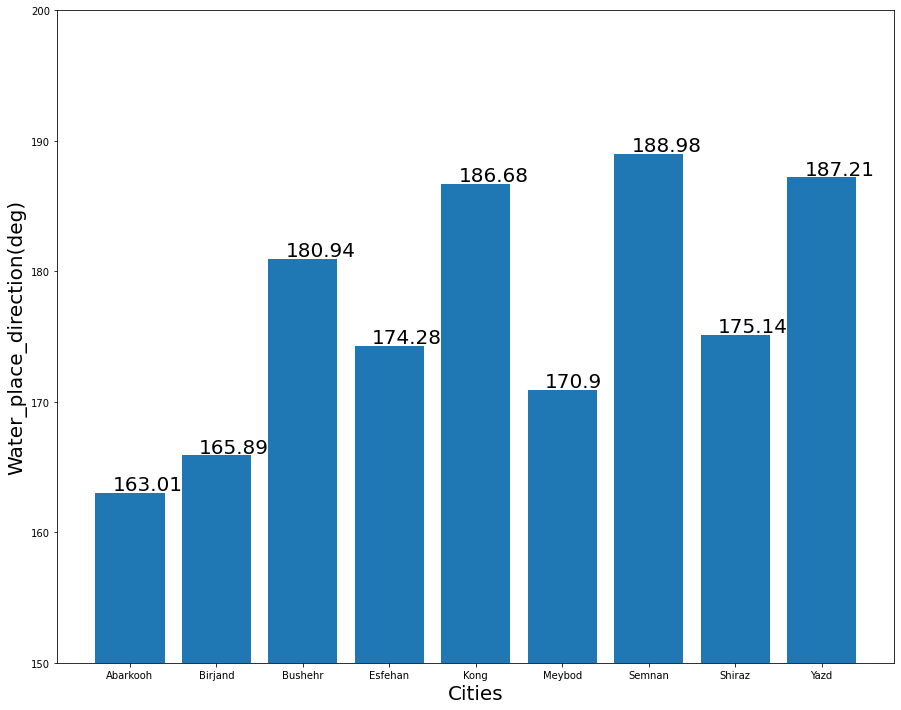

In [52]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Water_place_direction(deg)'])
plt.xlabel('Cities', fontdict=dict(fontsize=20))
plt.ylabel('Water_place_direction(deg)', fontdict=dict(fontsize=20))
for index,data in enumerate(df_cities.loc[:,'Water_place_direction(deg)']):
    plt.text(x=index-0.2, y =data+ 0.2 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=20))
plt.ylim(150,200)
# plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

In [41]:
df_geometric.to_csv('dataset_geometric.csv')

In [42]:
#--------------------------------------------

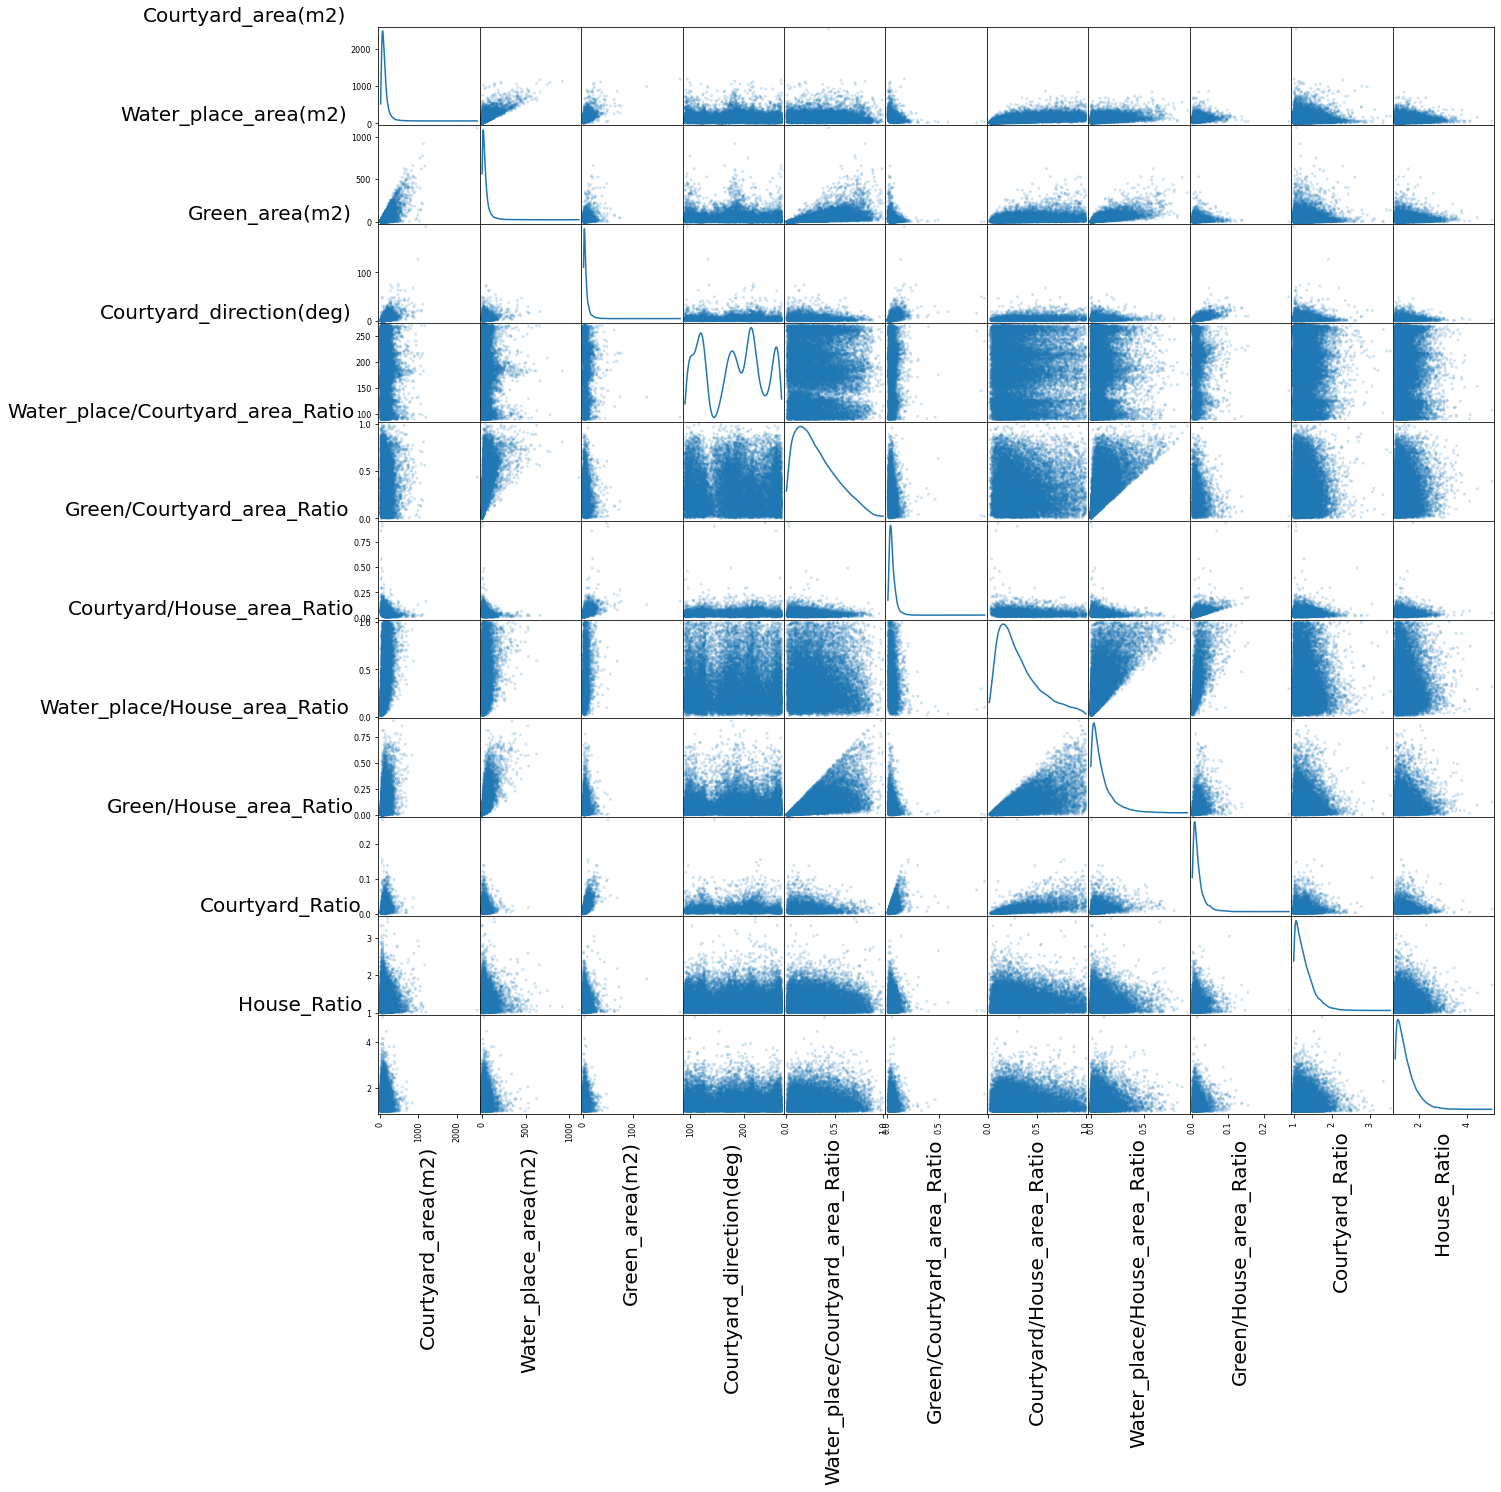

In [30]:
scatter_matrix = pd.plotting.scatter_matrix(df_geometric[['Courtyard_area(m2)','Water_place_area(m2)','Green_area(m2)','Courtyard_direction(deg)',
                                        'Water_place/Courtyard_area_Ratio','Green/Courtyard_area_Ratio','Courtyard/House_area_Ratio',
                                         'Water_place/House_area_Ratio','Green/House_area_Ratio','Courtyard_Ratio','House_Ratio']], alpha=0.2, figsize=[20,20], diagonal='kde')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, loc='top')

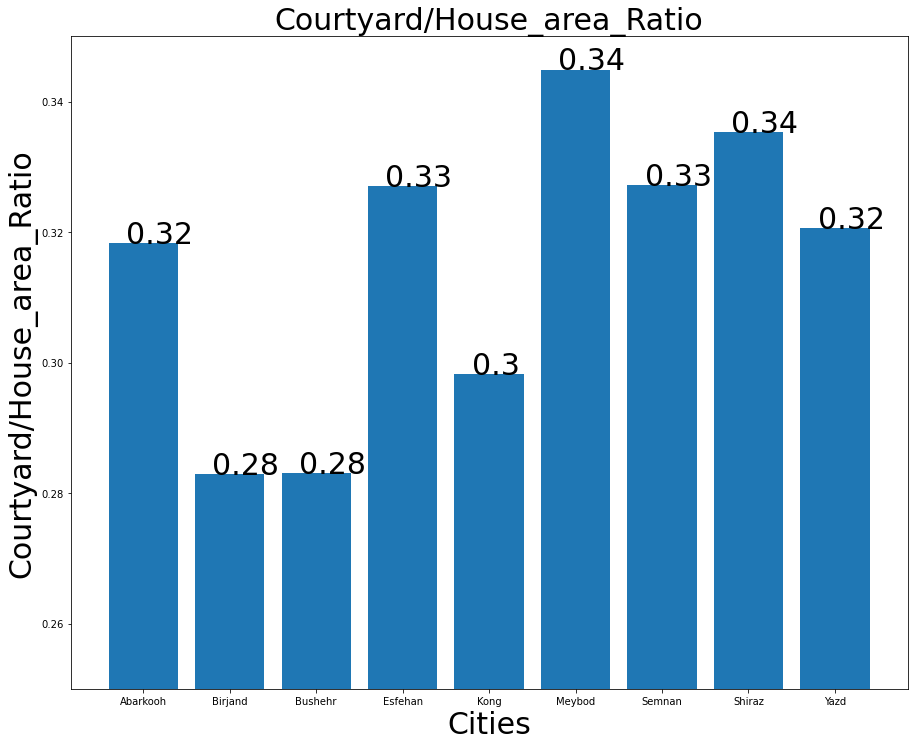

In [52]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Courtyard/House_area_Ratio'])
plt.xlabel('Cities', fontdict=dict(fontsize=30))
plt.ylabel('Courtyard/House_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(df_cities.loc[:,'Courtyard/House_area_Ratio']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(0.25,0.35)
# plt.grid()
plt.title('Courtyard/House_area_Ratio', fontdict=dict(fontsize=30))
plt.show()

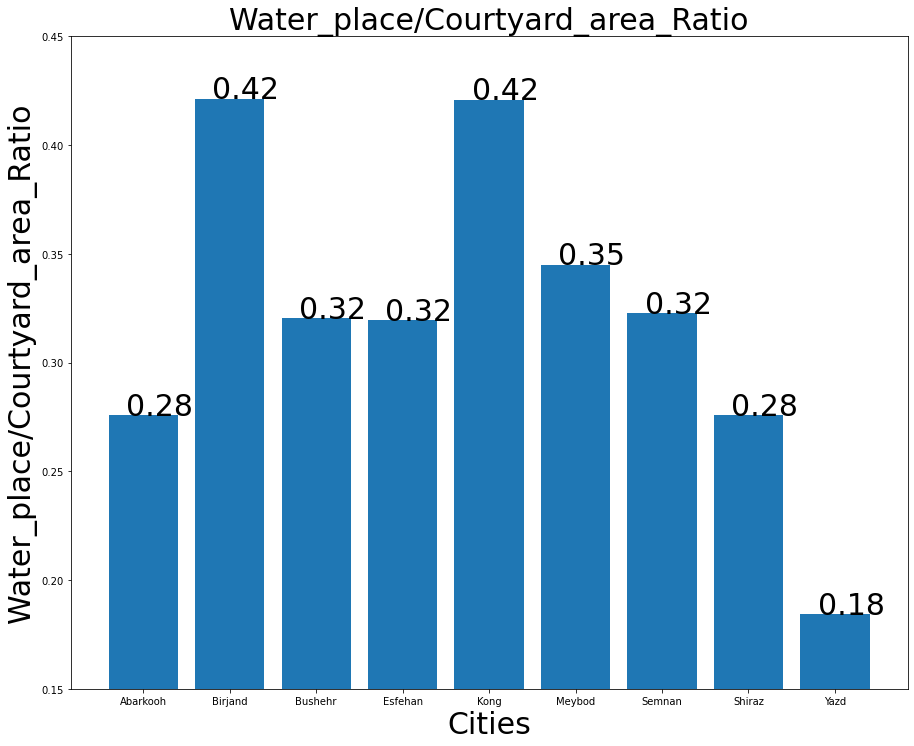

In [55]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Water_place/Courtyard_area_Ratio'])
plt.xlabel('Cities', fontdict=dict(fontsize=30))
plt.ylabel('Water_place/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(df_cities.loc[:,'Water_place/Courtyard_area_Ratio']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(0.15,0.45)
# plt.grid()
plt.title('Water_place/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
plt.show()

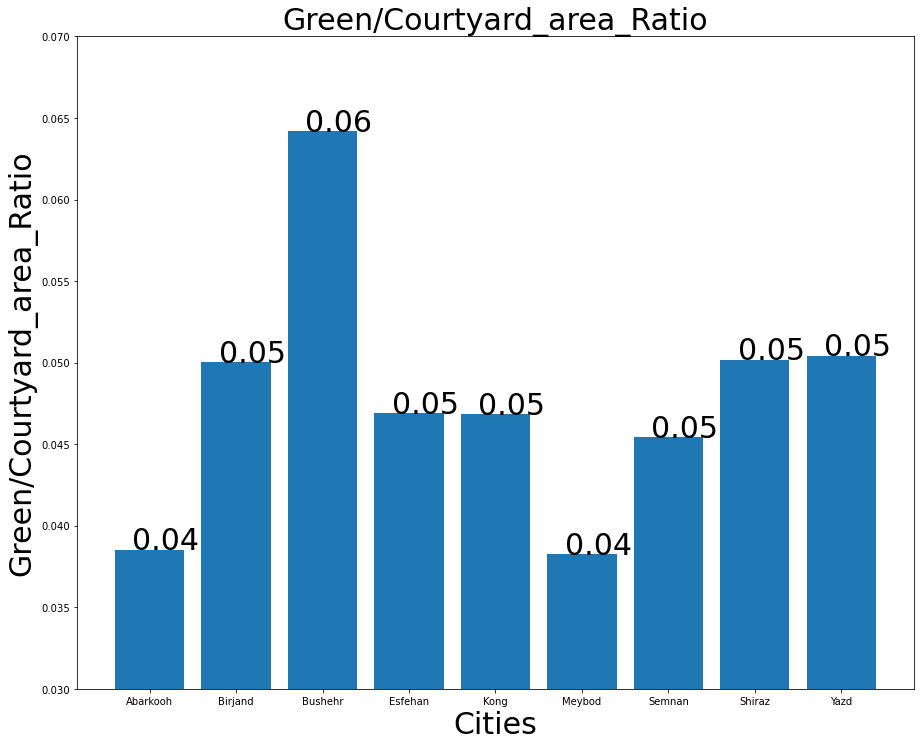

In [57]:
plt.figure(figsize=[15,12])
plt.bar(df_cities.index, df_cities['Green/Courtyard_area_Ratio'])
plt.xlabel('Cities', fontdict=dict(fontsize=30))
plt.ylabel('Green/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(df_cities.loc[:,'Green/Courtyard_area_Ratio']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(0.03,0.07)
# plt.grid()
plt.title('Green/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
plt.show()

In [22]:
zones = ['Bsh', 'Bsk', 'Bwh', 'Bwk']
data_zones = []
for i in zones:
    data_zones.append(df_2[df_2.climate_divisions == i].describe().loc['mean',:])

df_zones = pd.DataFrame(data_zones, index= zones, columns= df_2.columns)

In [24]:
df_zones.to_csv('dataset_zones.csv')

In [25]:
#------------------------------------

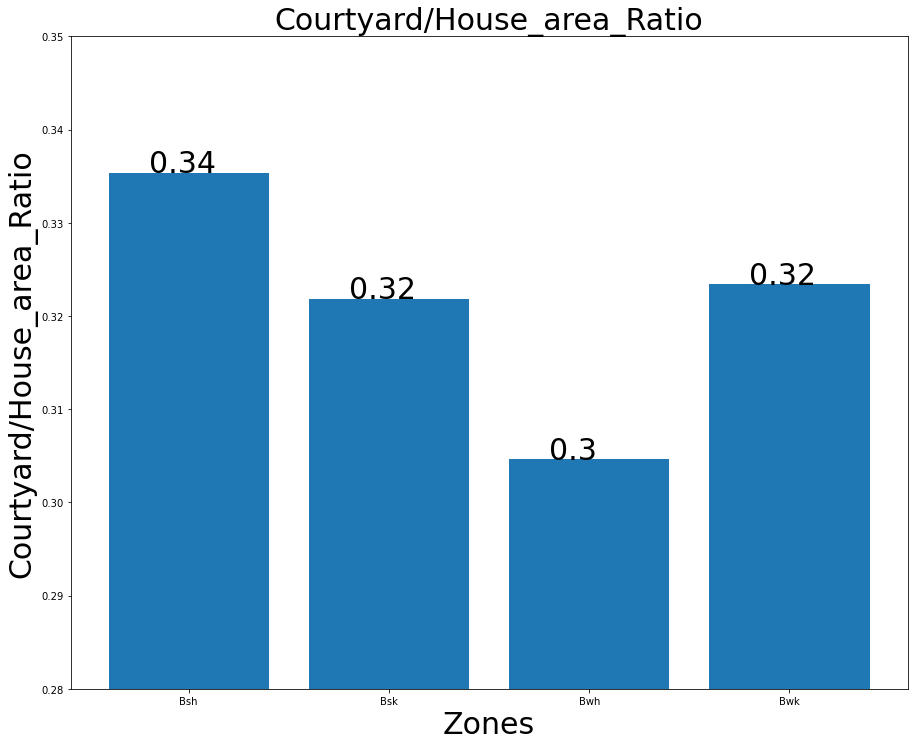

In [59]:
plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['Courtyard/House_area_Ratio'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('Courtyard/House_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'Courtyard/House_area_Ratio']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(0.28,0.35)
# plt.grid()
plt.title('Courtyard/House_area_Ratio', fontdict=dict(fontsize=30))
plt.show()

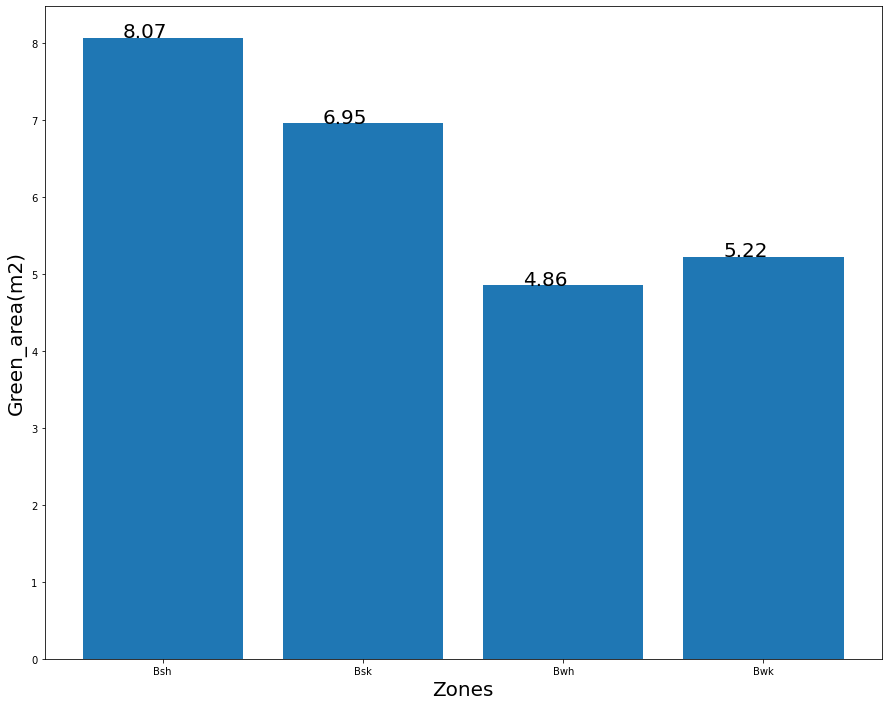

In [27]:
plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['Green_area(m2)'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('Green_area(m2)', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'Green_area(m2)']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))

# plt.grid()
plt.title('Scatter plot of the length and width of the courtyards', fontdict=dict(fontsize=30))
plt.show()

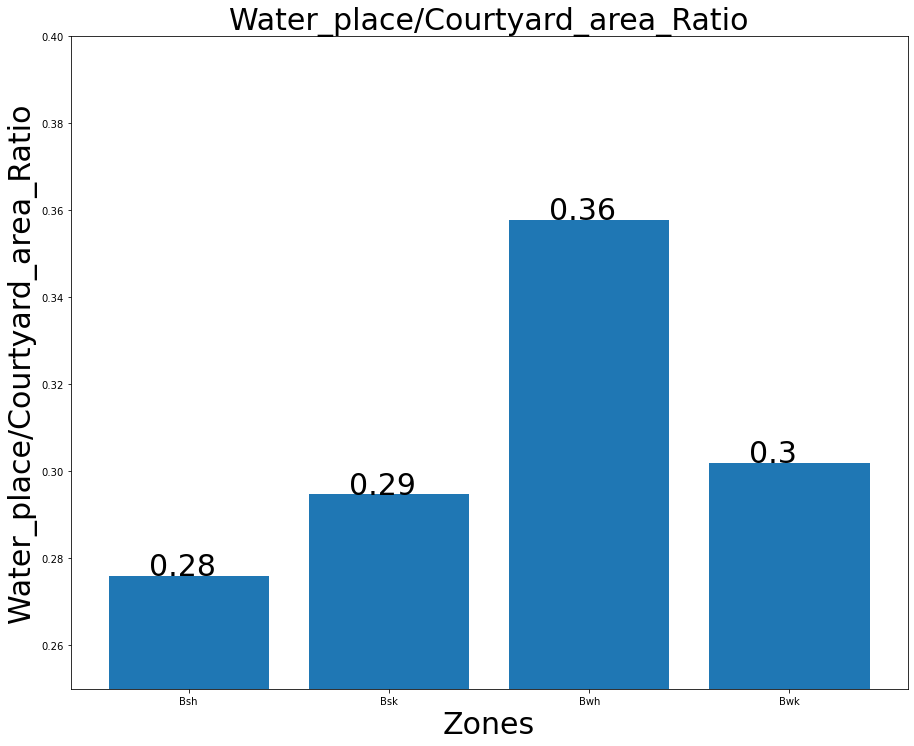

In [60]:
plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['Water_place/Courtyard_area_Ratio'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('Water_place/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'Water_place/Courtyard_area_Ratio']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(0.25,0.4)
# plt.grid()
plt.title('Water_place/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
plt.show()

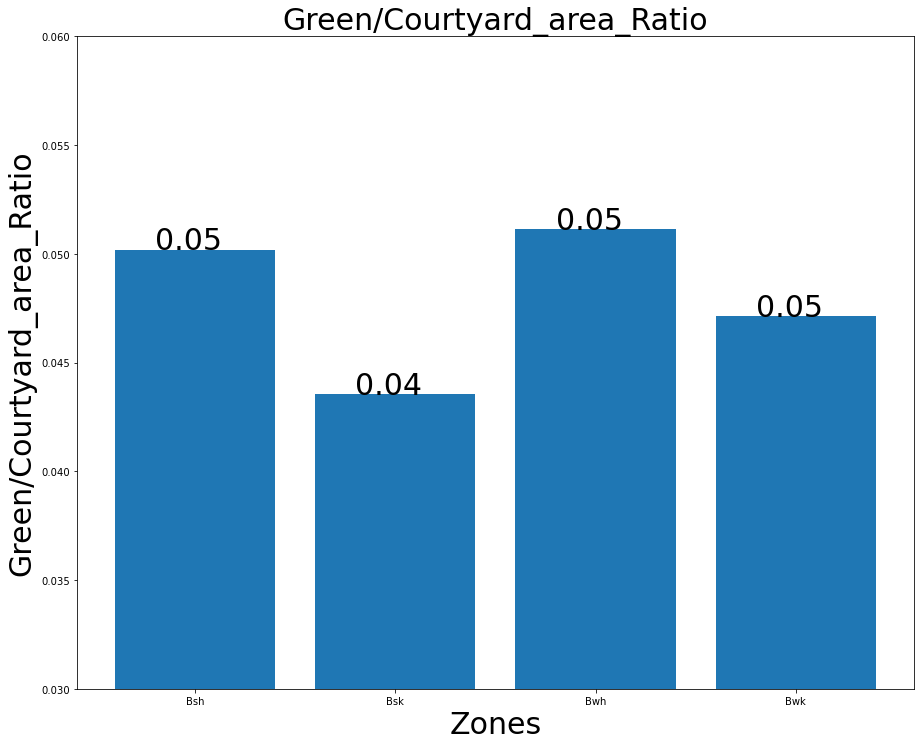

In [61]:
plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['Green/Courtyard_area_Ratio'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('Green/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'Green/Courtyard_area_Ratio']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(0.03,0.06)
# plt.grid()
plt.title('Green/Courtyard_area_Ratio', fontdict=dict(fontsize=30))
plt.show()

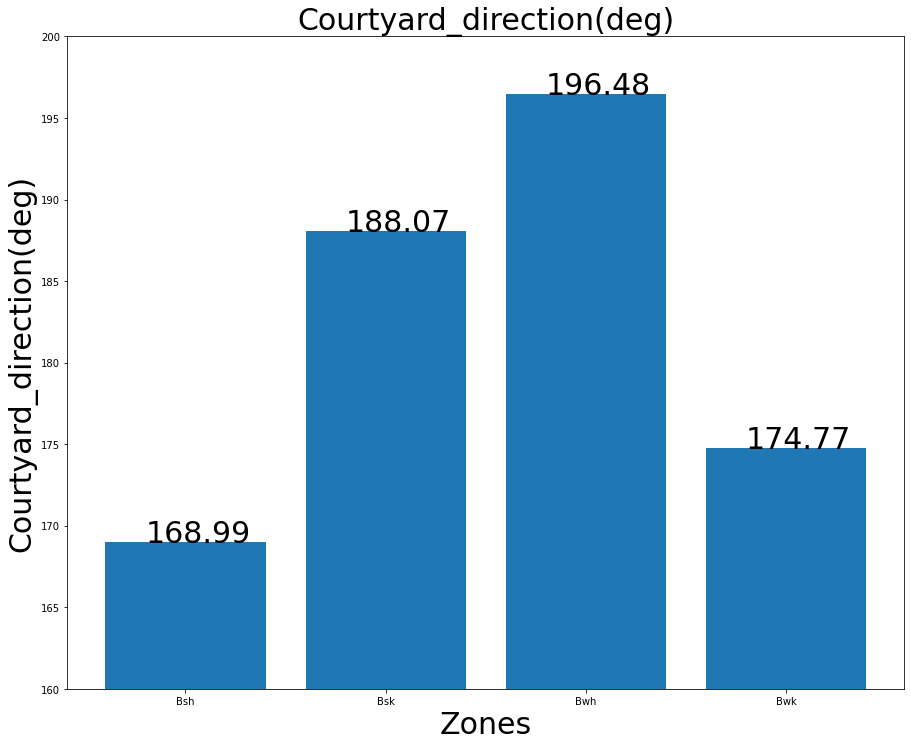

In [63]:

plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['Courtyard_direction(deg)'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('Courtyard_direction(deg)', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'Courtyard_direction(deg)']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(160,200)
# plt.grid()
plt.title('Courtyard_direction(deg)', fontdict=dict(fontsize=30))
plt.show()

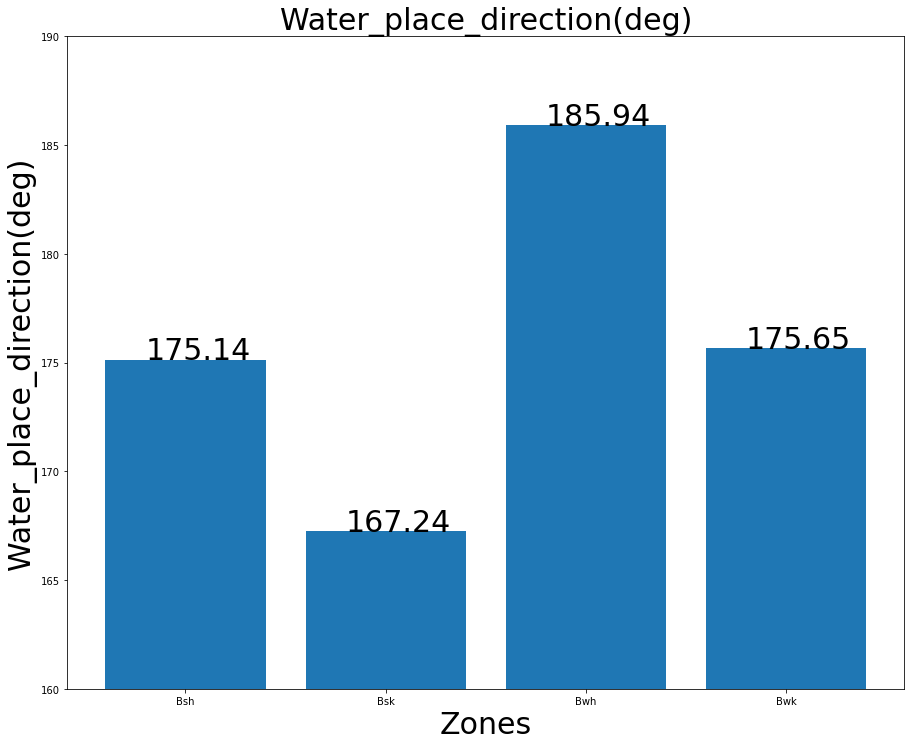

In [65]:

plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['Water_place_direction(deg)'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('Water_place_direction(deg)', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'Water_place_direction(deg)']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(160,190)
# plt.grid()
plt.title('Water_place_direction(deg)', fontdict=dict(fontsize=30))
plt.show()

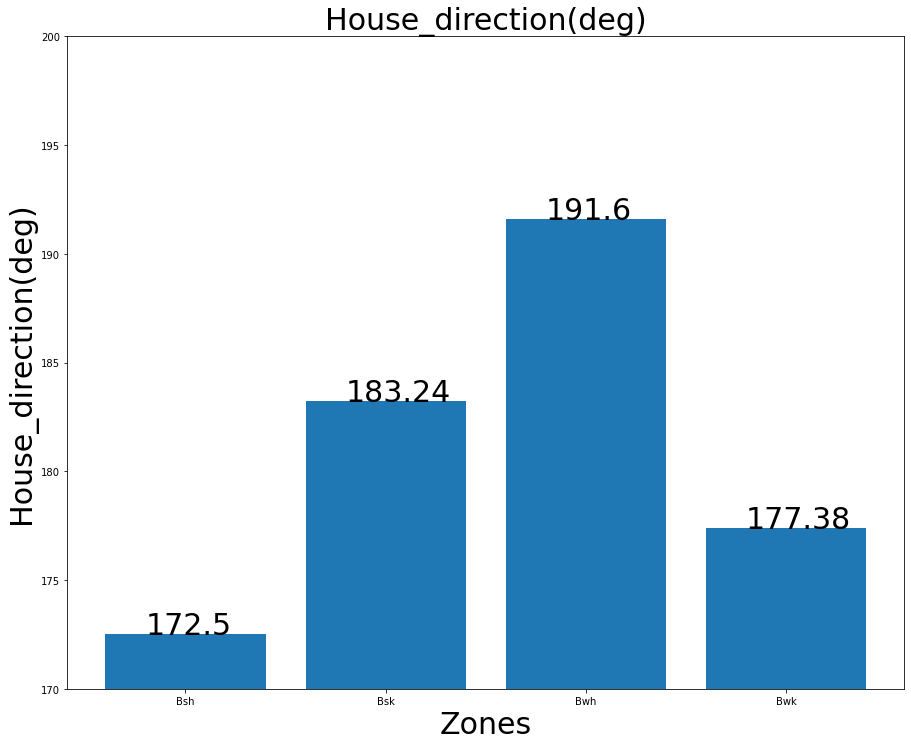

In [67]:

plt.figure(figsize=[15,12])
plt.bar(df_zones.index, df_zones['House_direction(deg)'])
plt.xlabel('Zones', fontdict=dict(fontsize=30))
plt.ylabel('House_direction(deg)', fontdict=dict(fontsize=30))
for index,data in enumerate(df_zones.loc[:,'House_direction(deg)']):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))
plt.ylim(170,200)
# plt.grid()
plt.title('House_direction(deg)', fontdict=dict(fontsize=30))
plt.show()

In [25]:
regressor.coef_
round(regressor.coef_[0][0], 2)
regressor.coef_[0][0]

0.6717000562703148

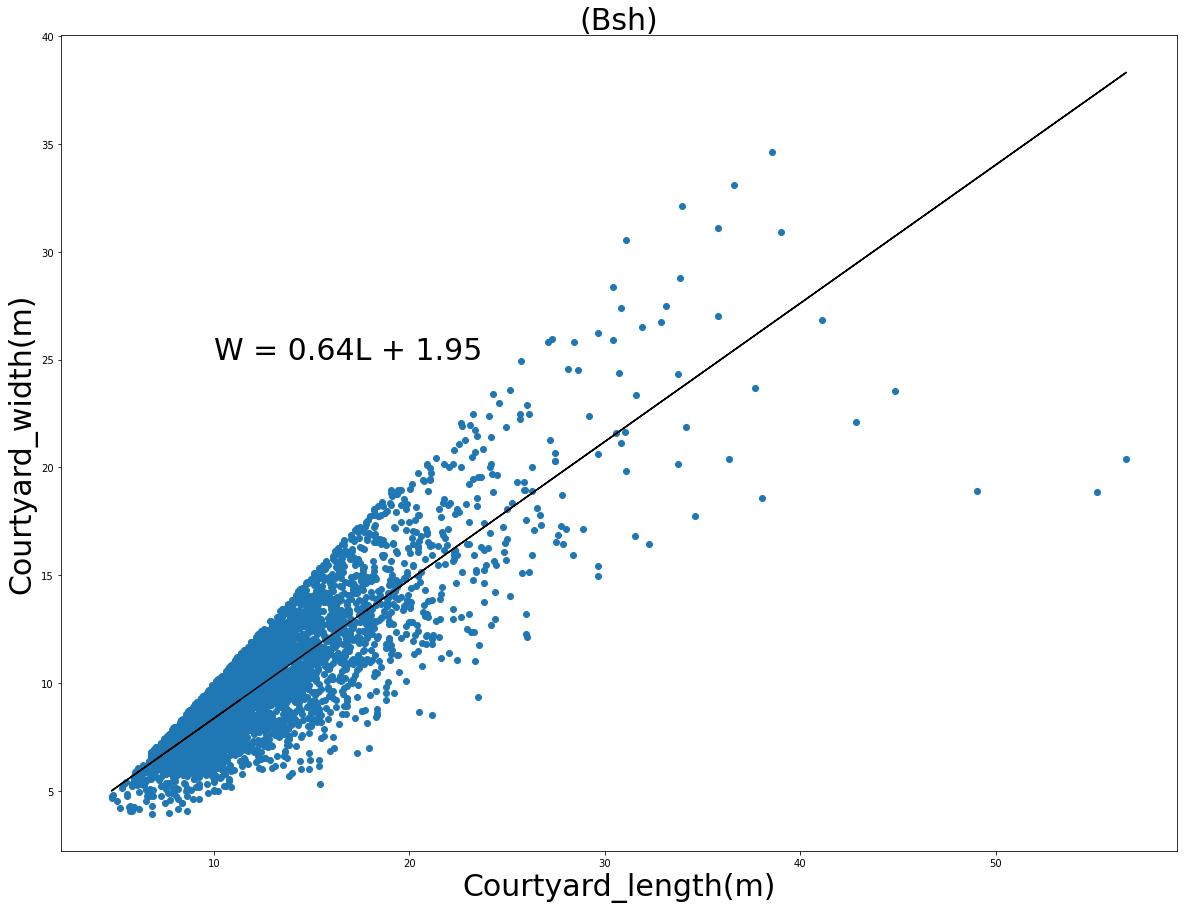

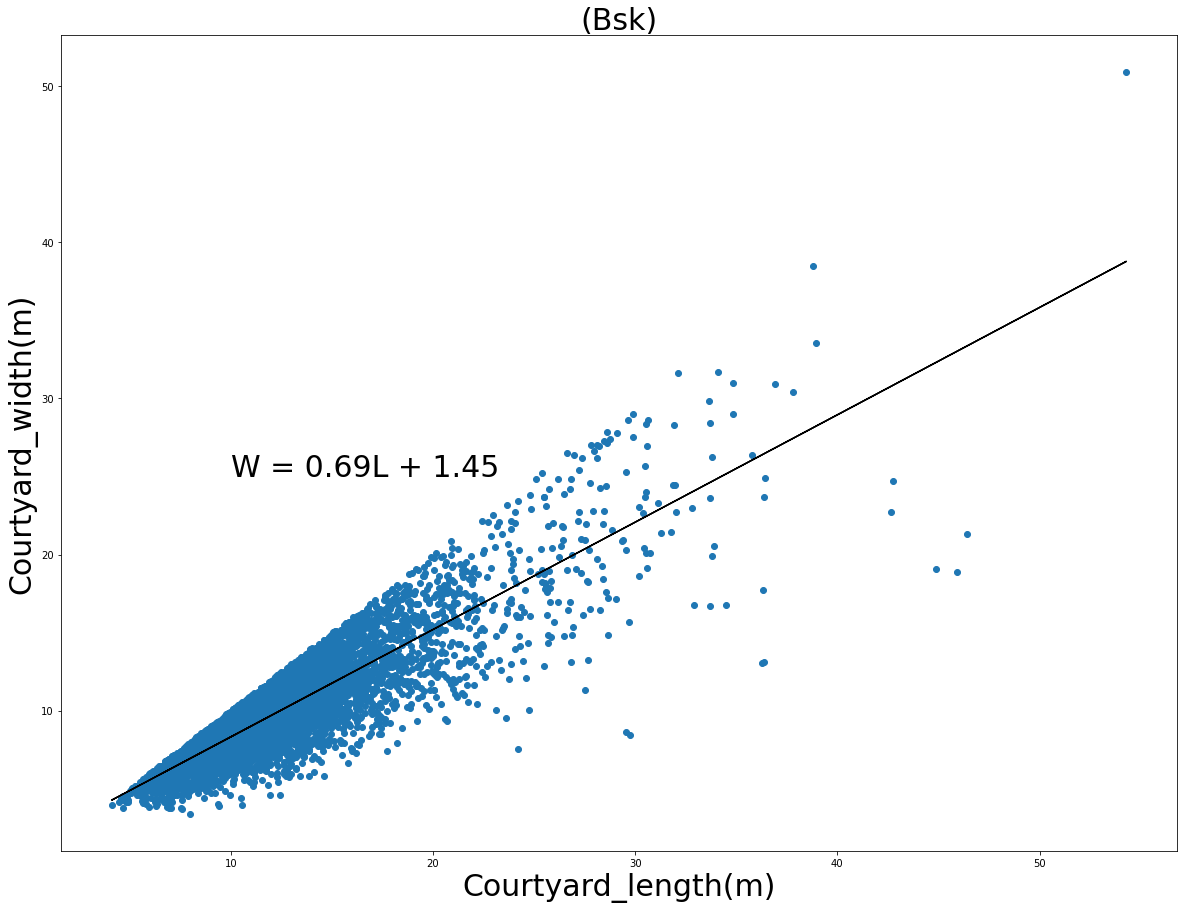

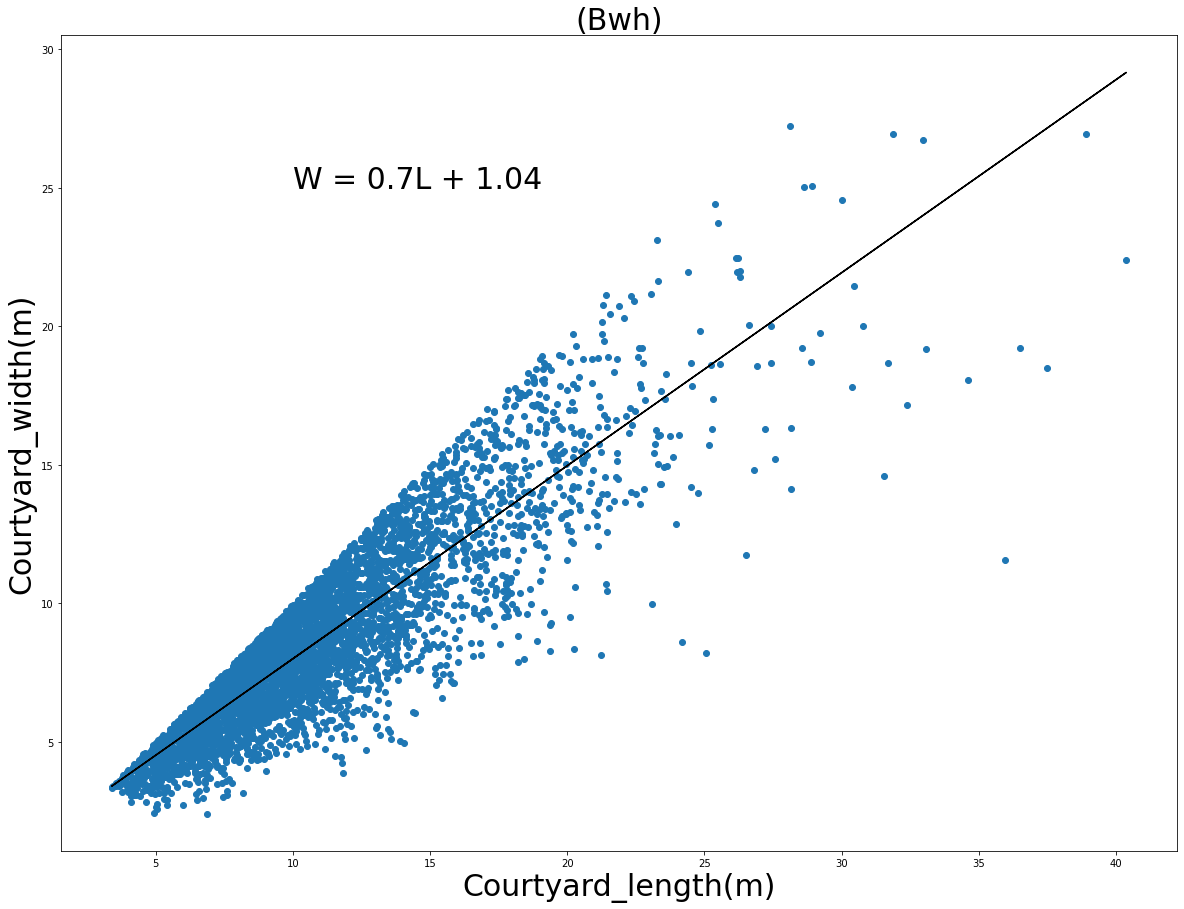

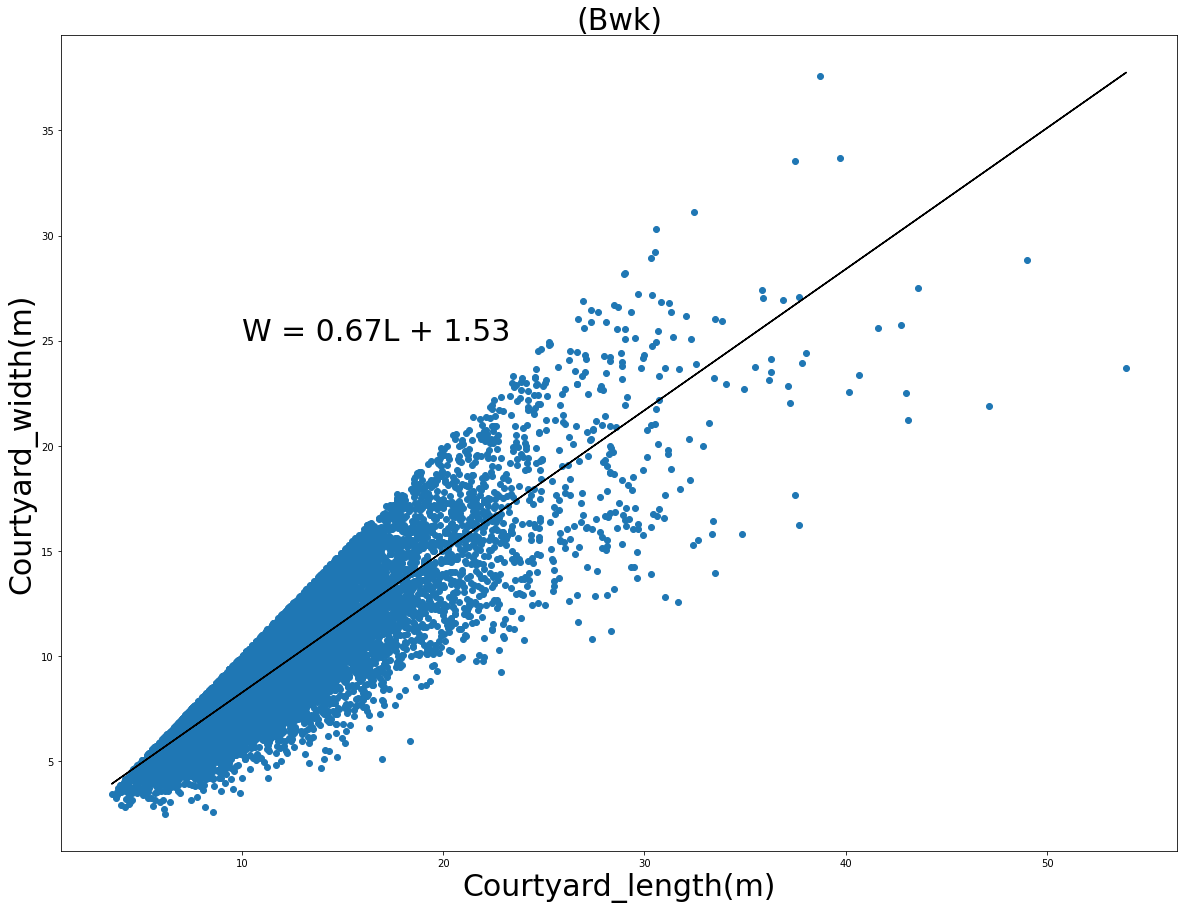

In [5]:
zones = ['Bsh', 'Bsk', 'Bwh', 'Bwk']

regressor = LinearRegression()
for i in zones:
    X = df_2[df_2.climate_divisions == i]['Courtyard_length(m)'].values.reshape(-1, 1)
    y = df_2[df_2.climate_divisions == i]['Courtyard_width(m)'].values.reshape(-1, 1)
    
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    plt.figure(figsize=[20,15])
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='k')
    plt.text(x=10, y =25 , s=f"W = {round(regressor.coef_[0][0], 2)}L + {round(regressor.intercept_[0], 2)}" , fontdict=dict(fontsize=30))
    plt.xlabel('Courtyard_length(m)', fontdict=dict(fontsize=30))
    plt.ylabel('Courtyard_width(m)', fontdict=dict(fontsize=30))
    plt.title(f'({i})', fontdict=dict(fontsize=30))
    plt.show()

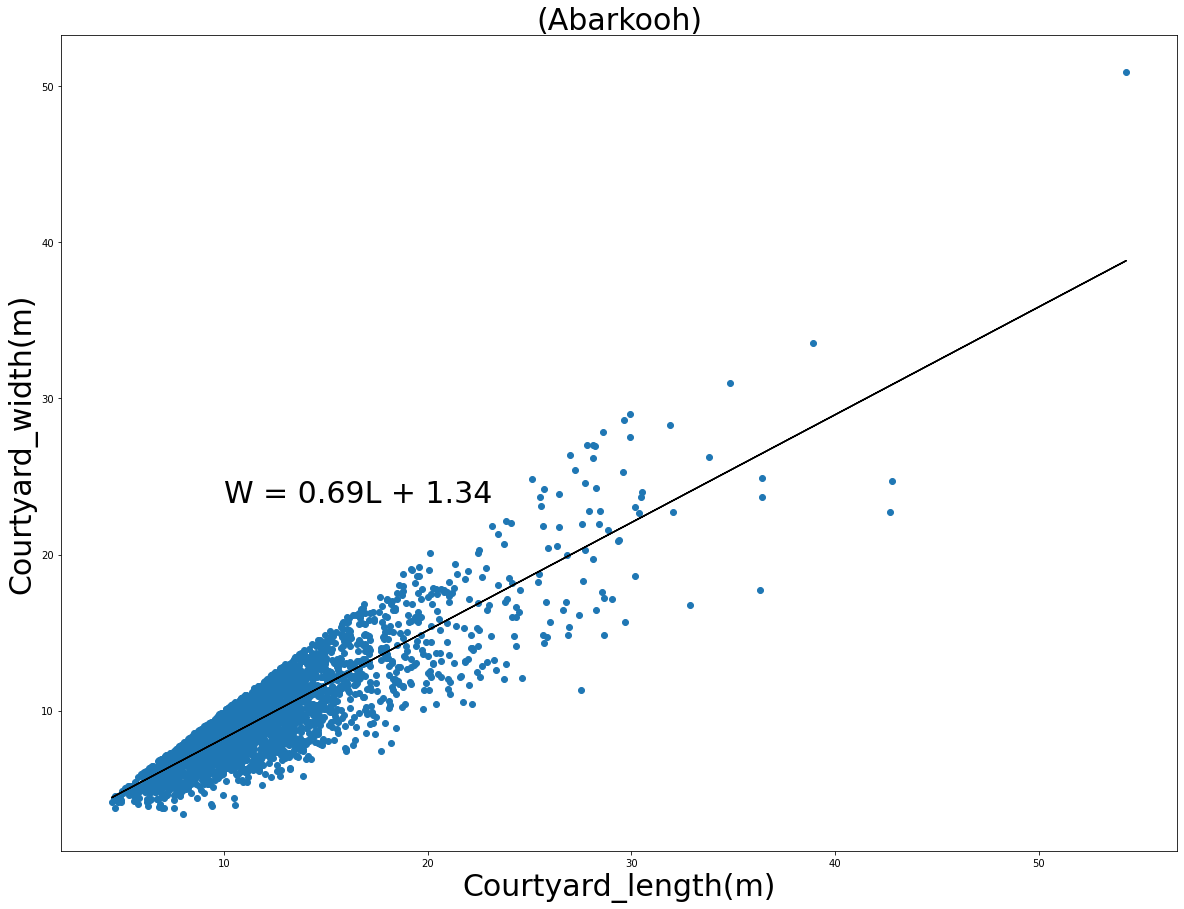

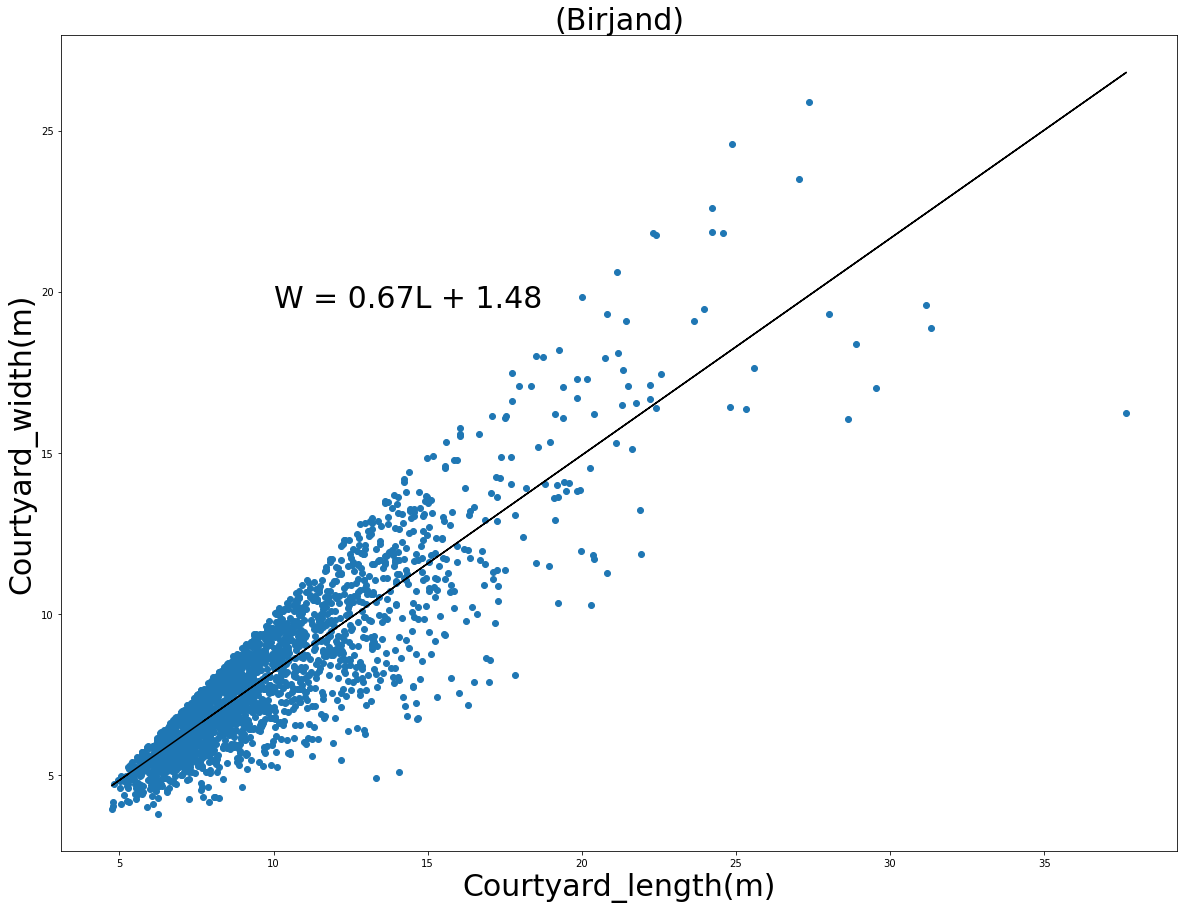

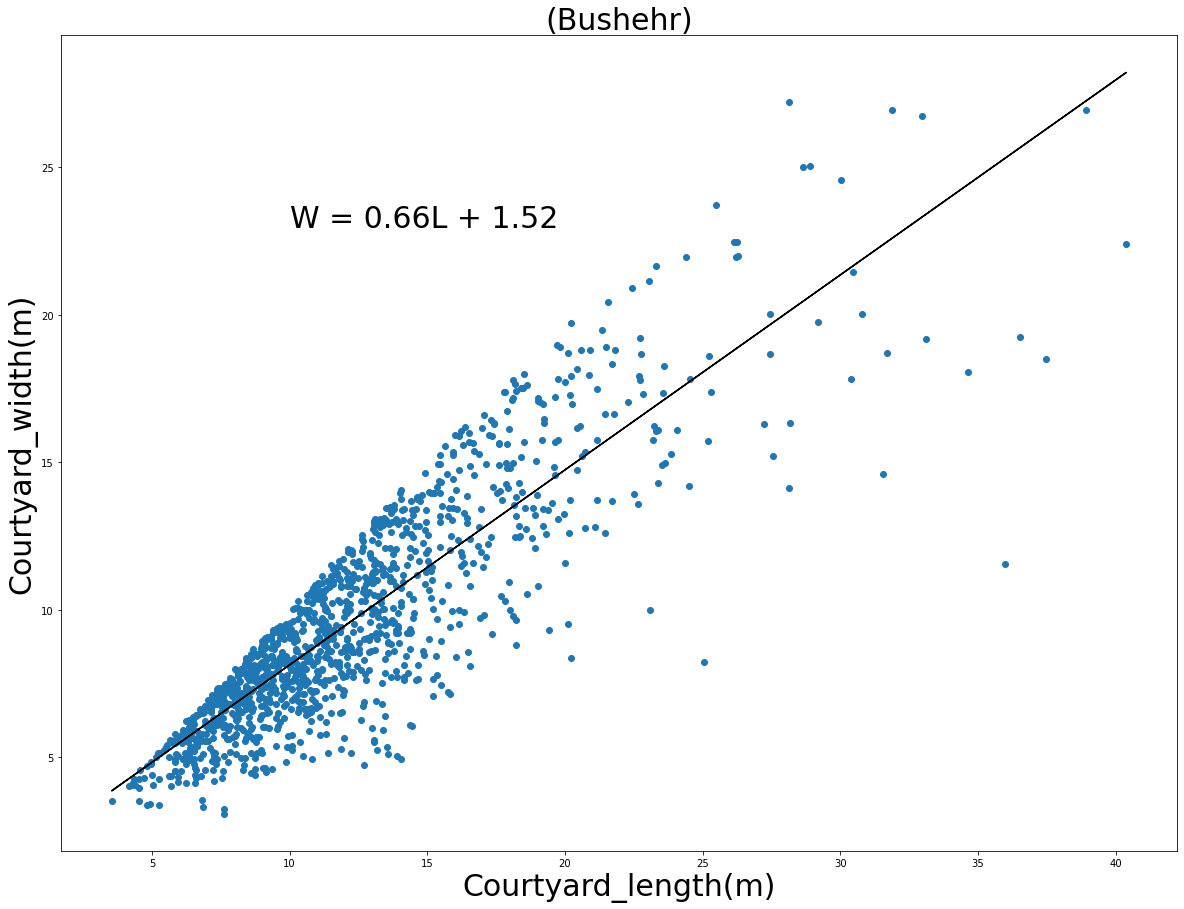

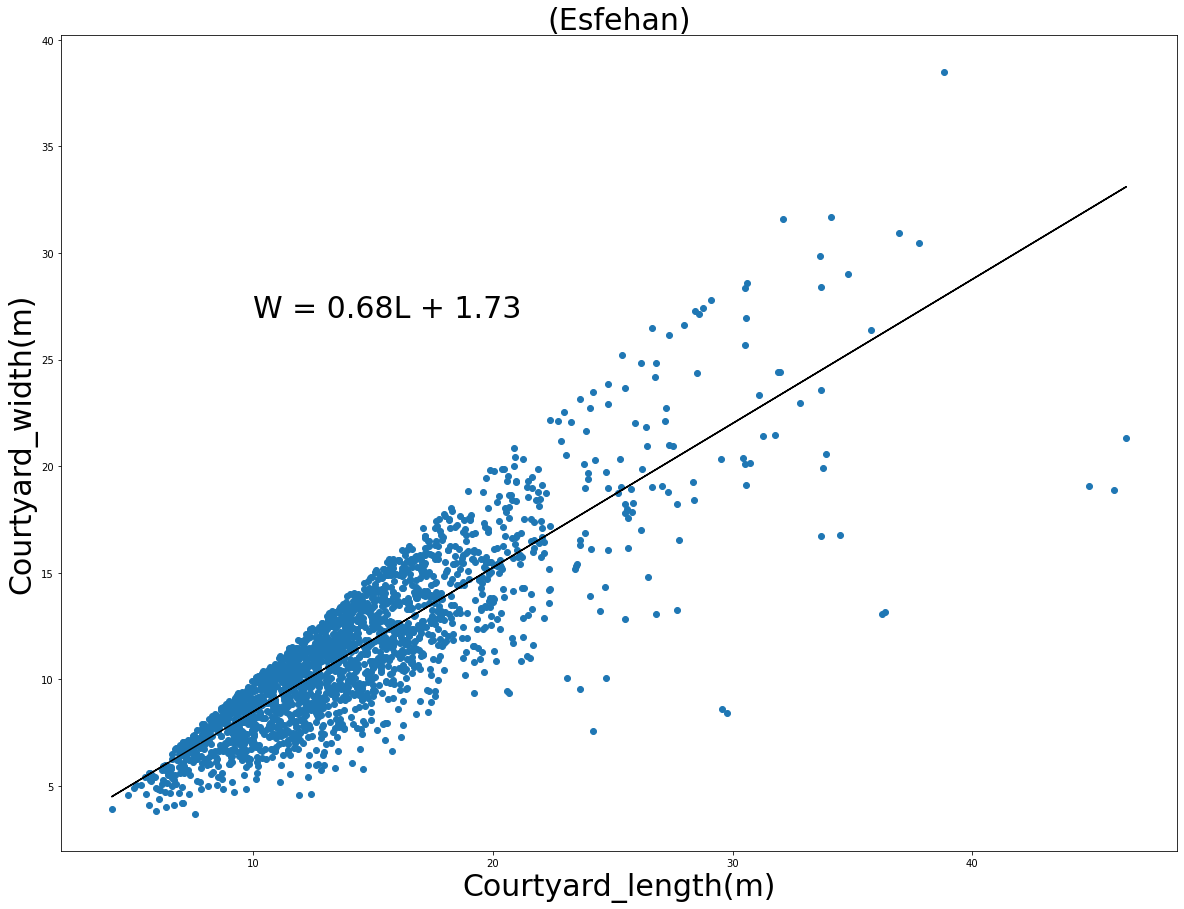

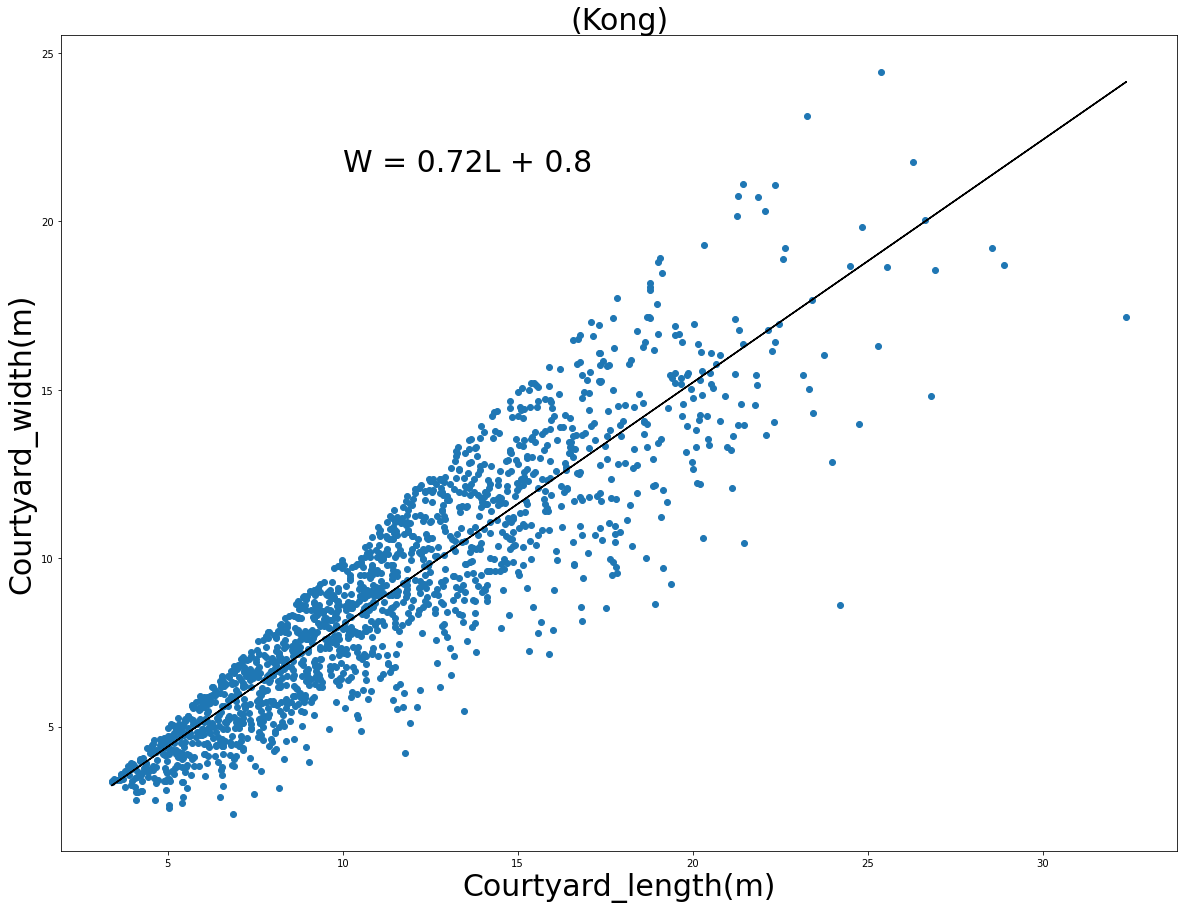

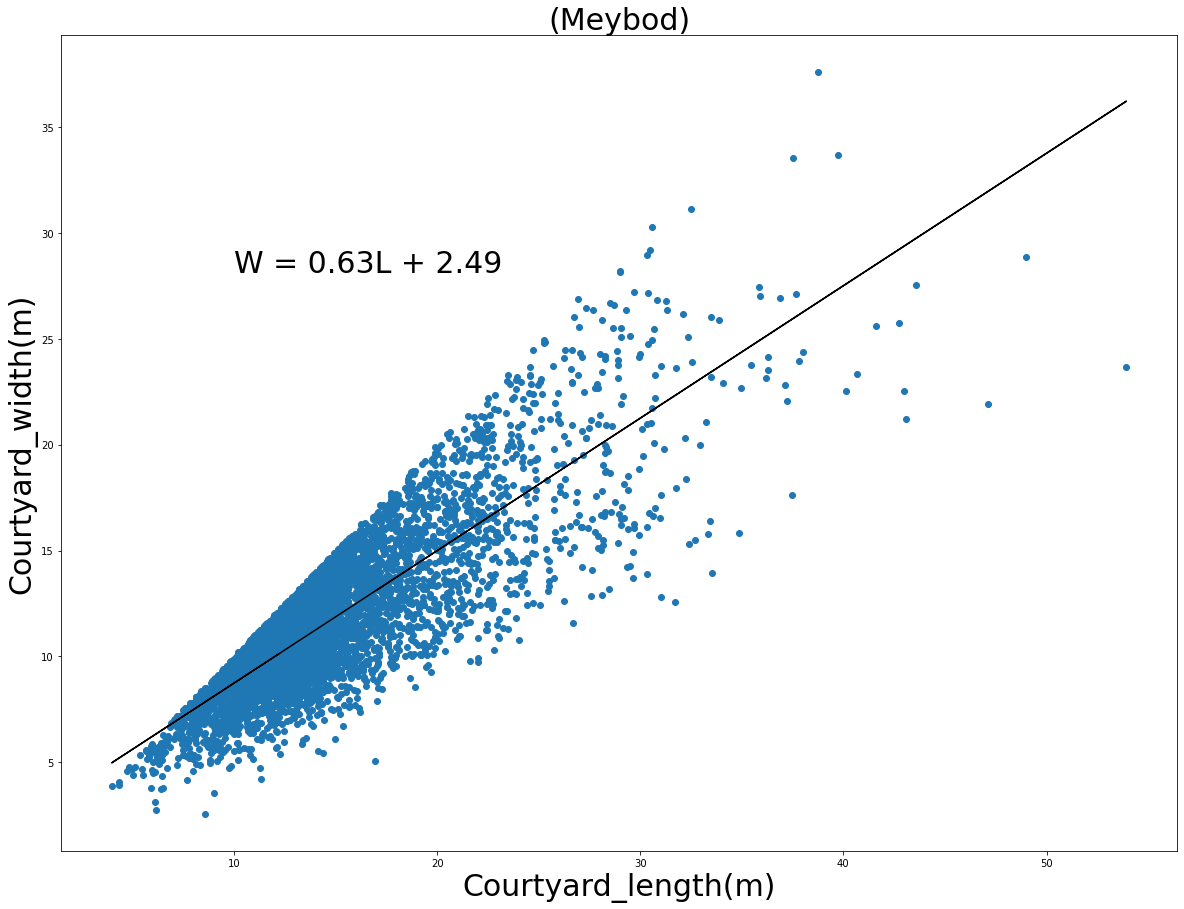

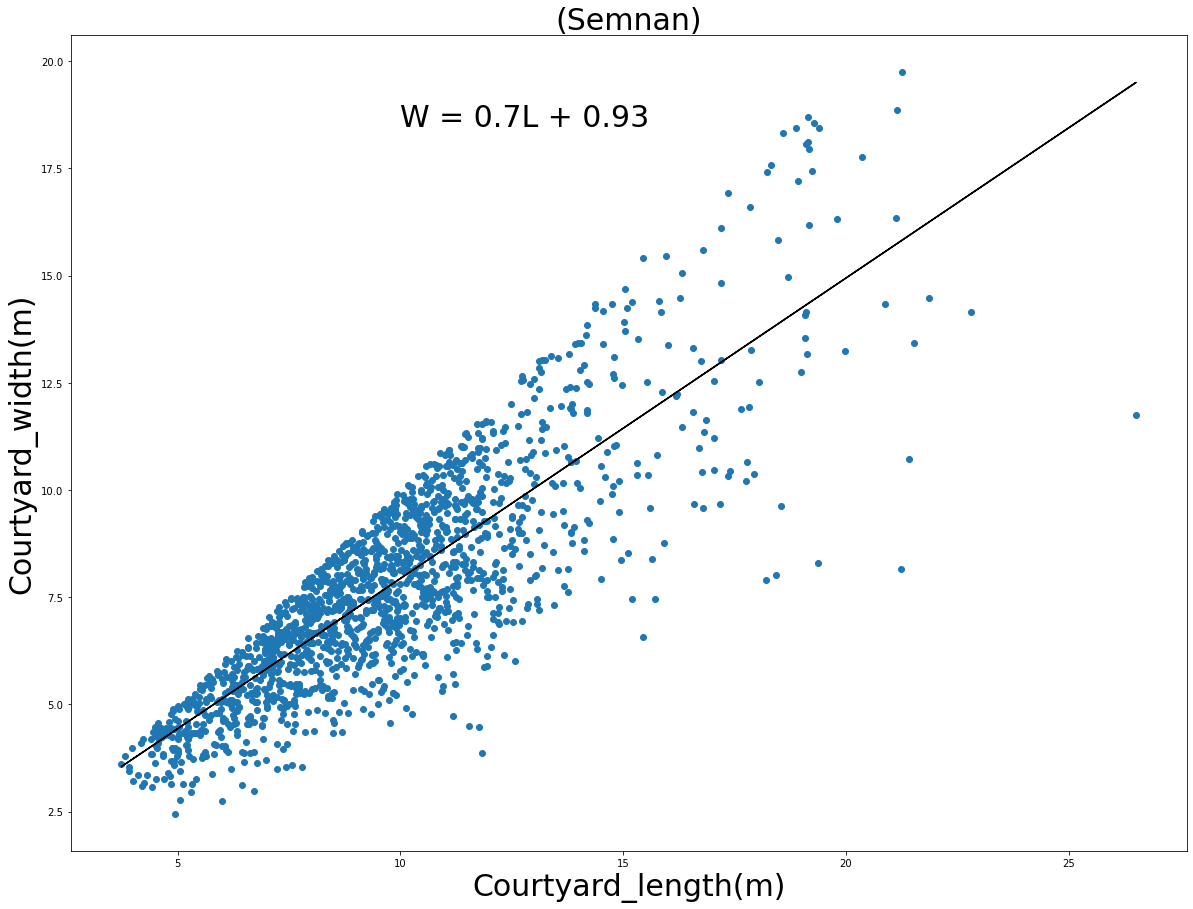

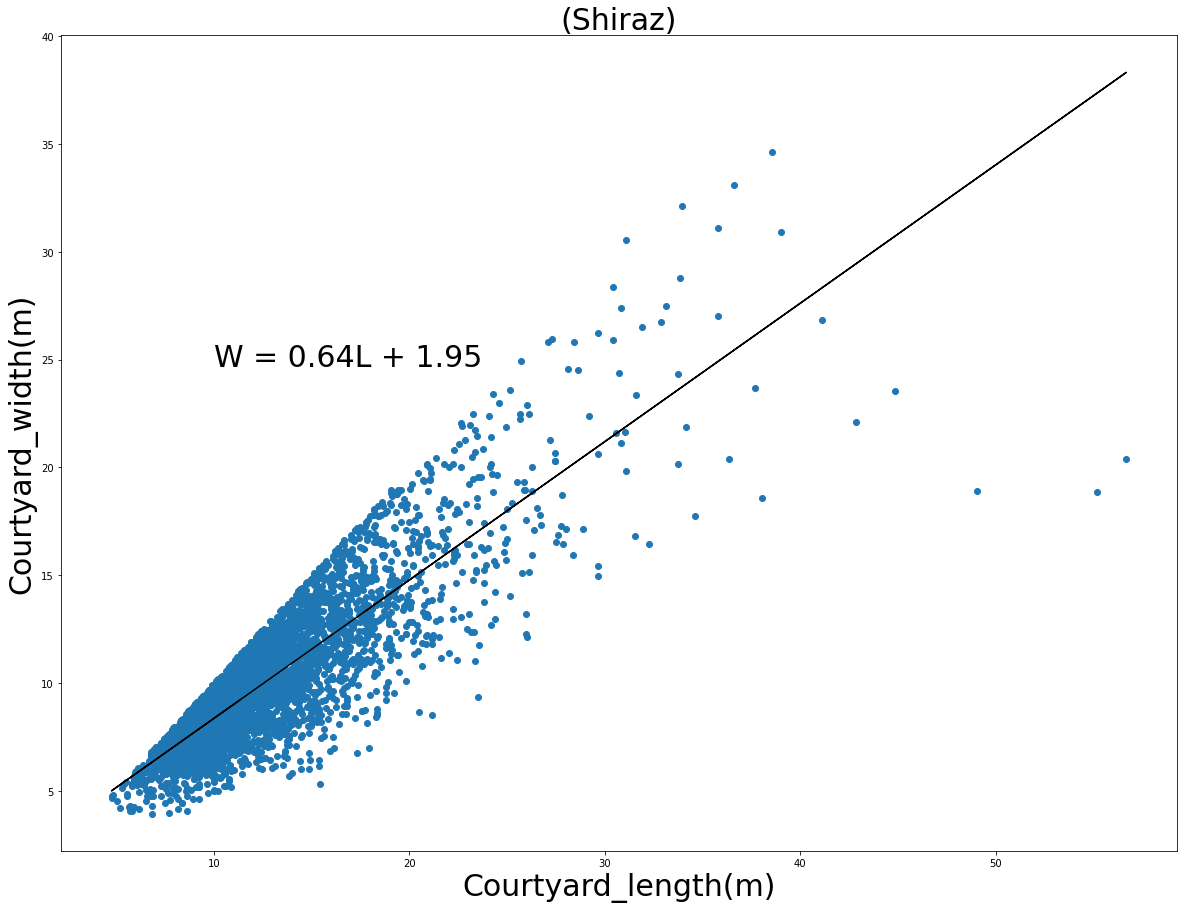

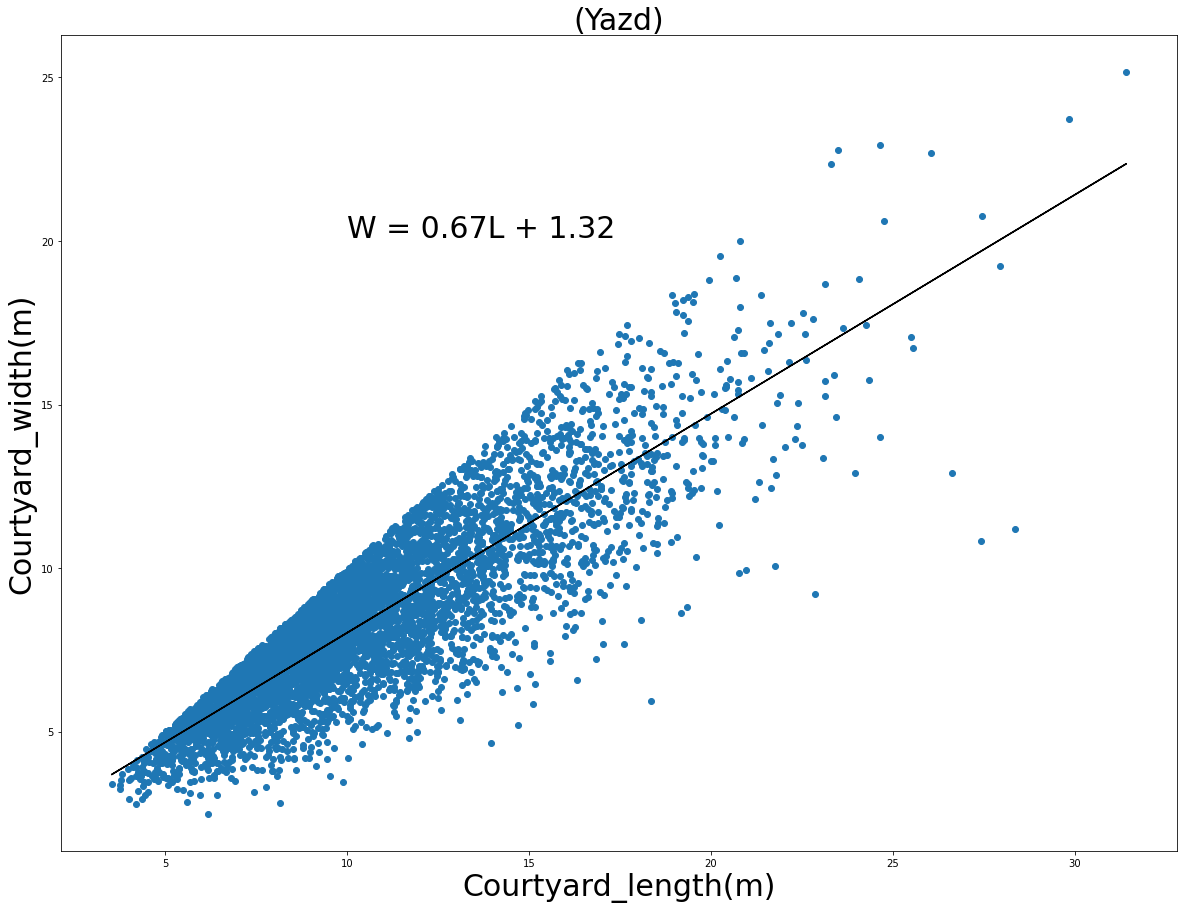

In [6]:

regressor = LinearRegression()
for i in df_cities.index:
    X = df_2[df_2.City == i]['Courtyard_length(m)'].values.reshape(-1, 1)
    y = df_2[df_2.City == i]['Courtyard_width(m)'].values.reshape(-1, 1)
    
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    plt.figure(figsize=[20,15])
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='k')
    plt.text(x=10, y =df_cities.loc[i, 'Courtyard_width(m)']*2.4 , s=f"W = {round(regressor.coef_[0][0], 2)}L + {round(regressor.intercept_[0], 2)}" , fontdict=dict(fontsize=30))
    plt.xlabel('Courtyard_length(m)', fontdict=dict(fontsize=30))
    plt.ylabel('Courtyard_width(m)', fontdict=dict(fontsize=30))
    plt.title(f'({i})', fontdict=dict(fontsize=30))
    plt.show()

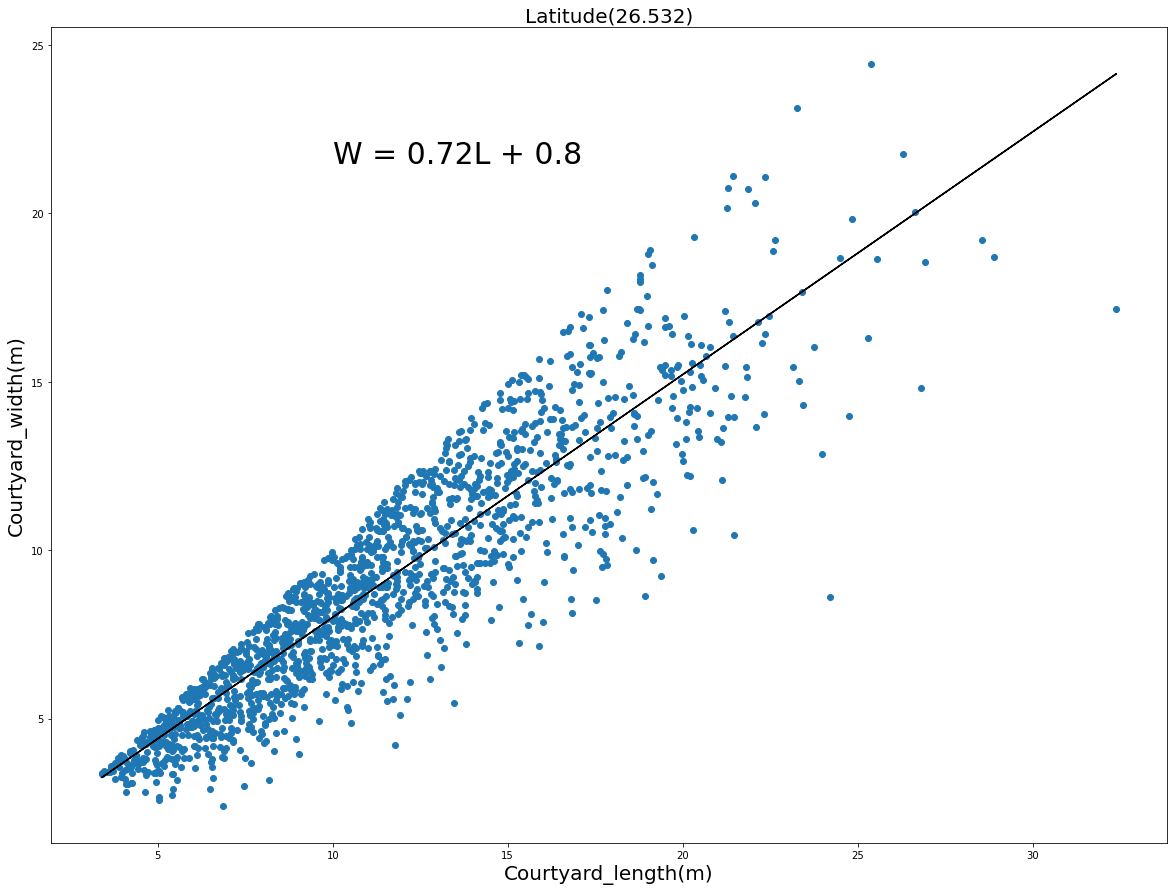

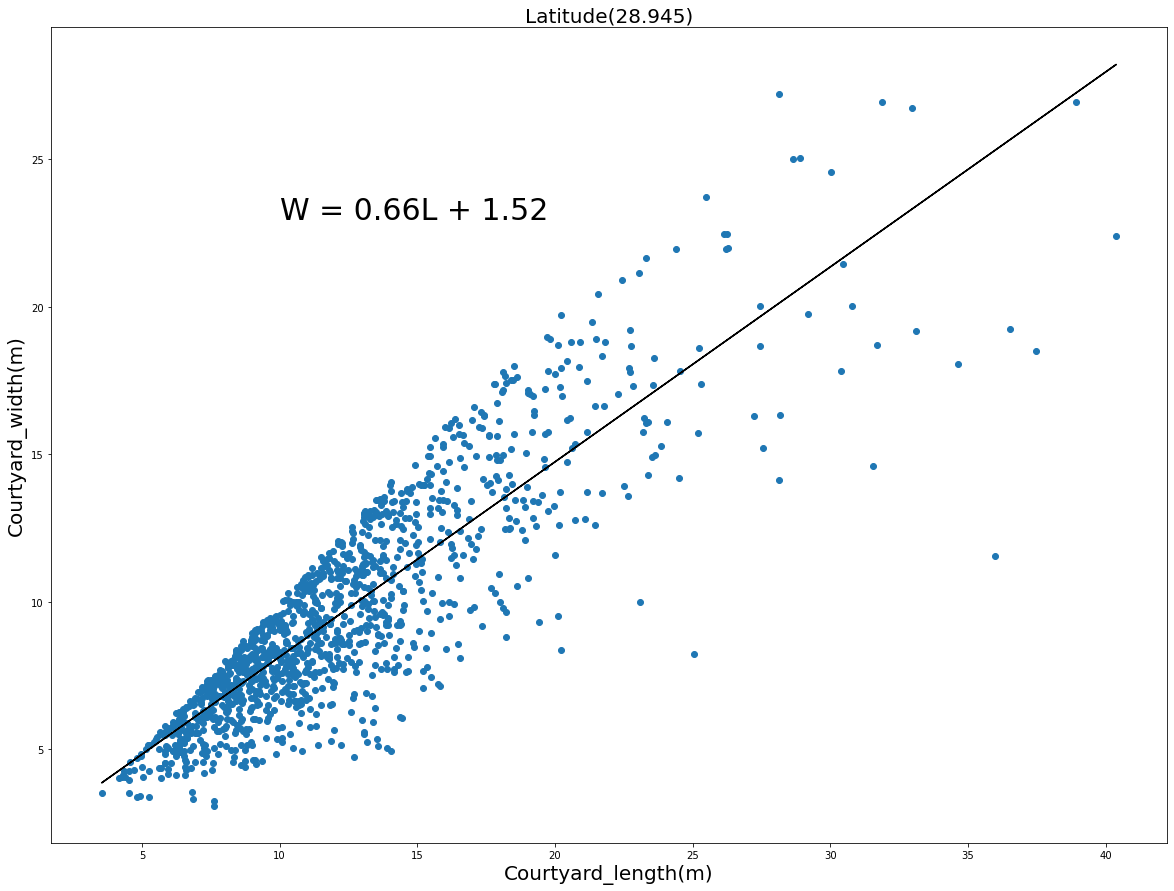

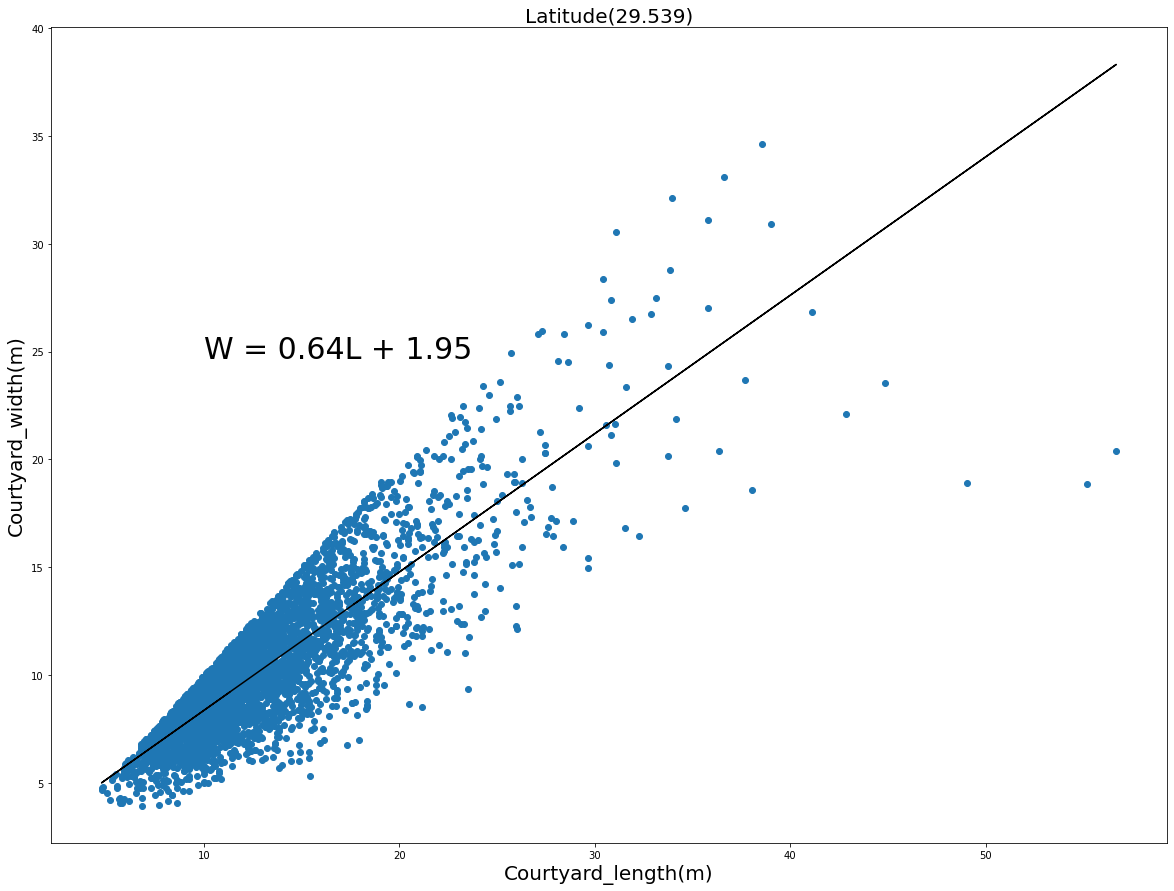

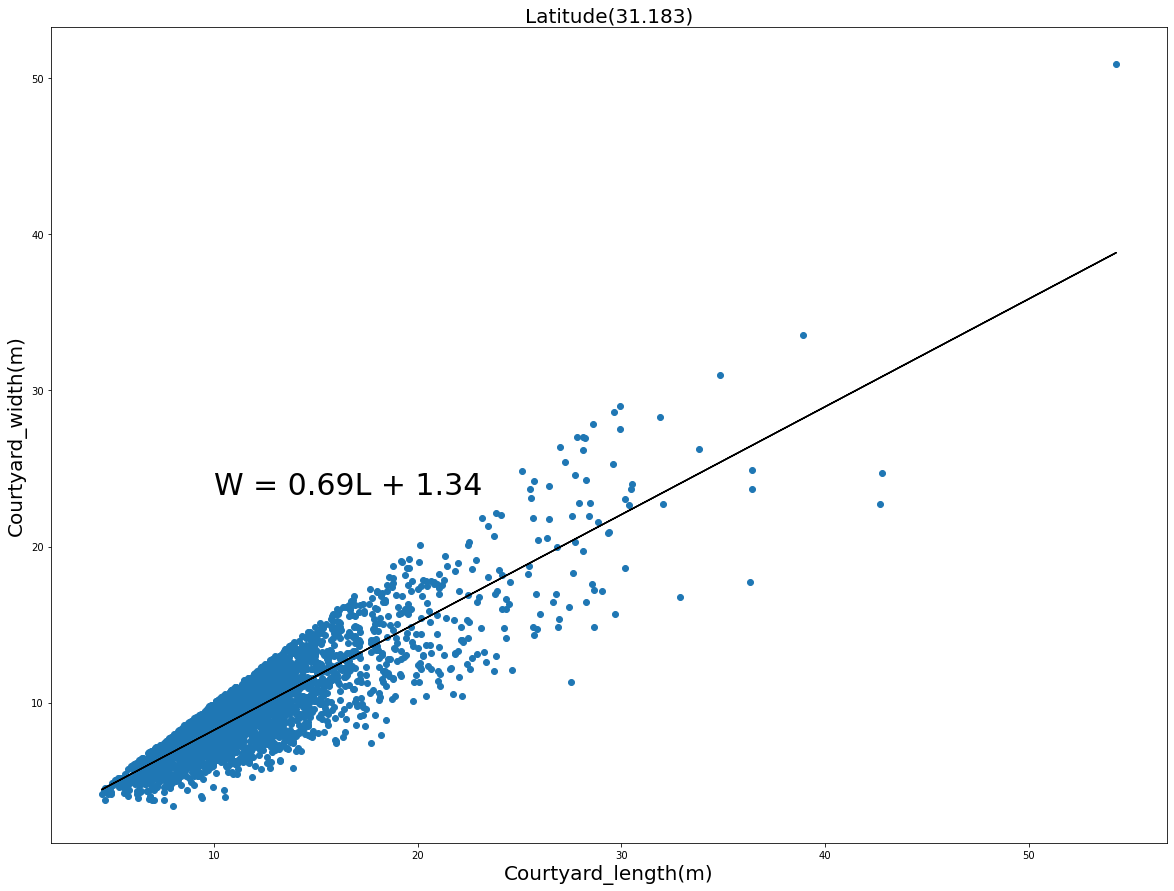

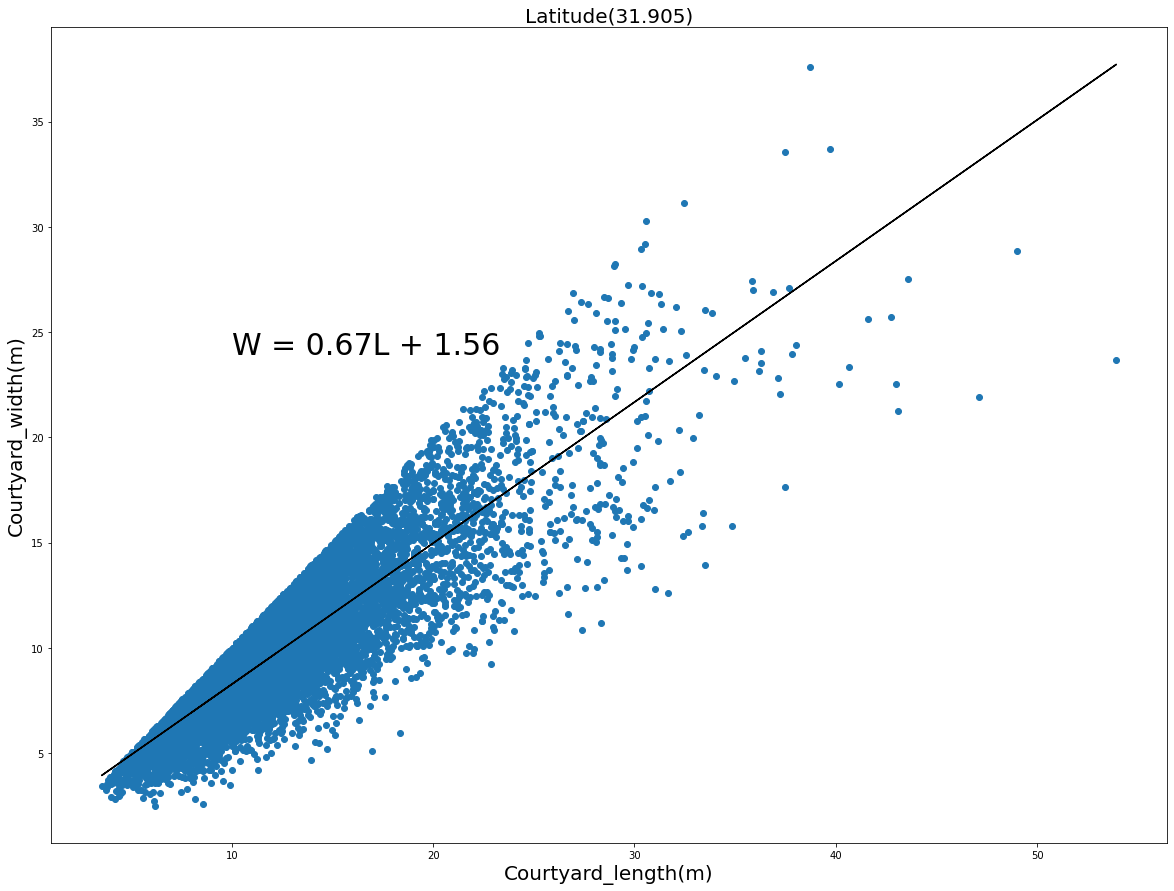

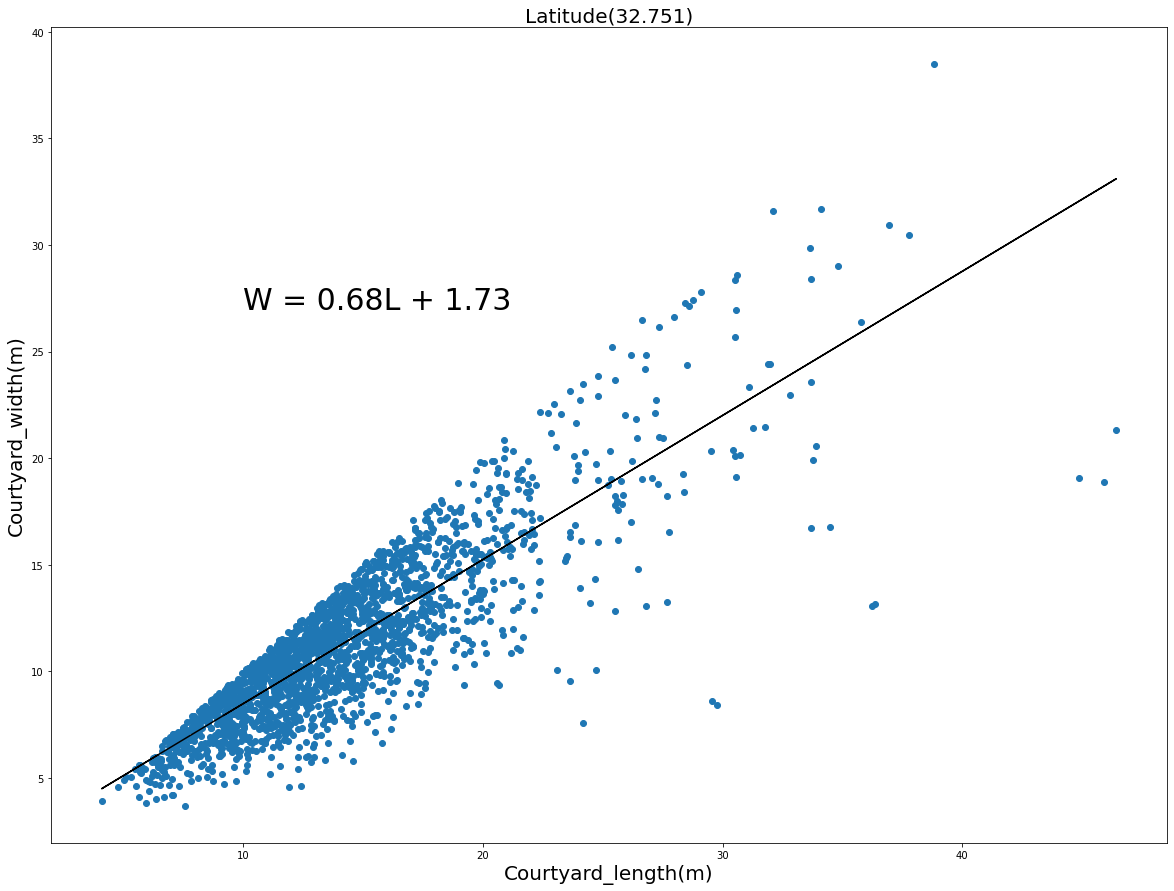

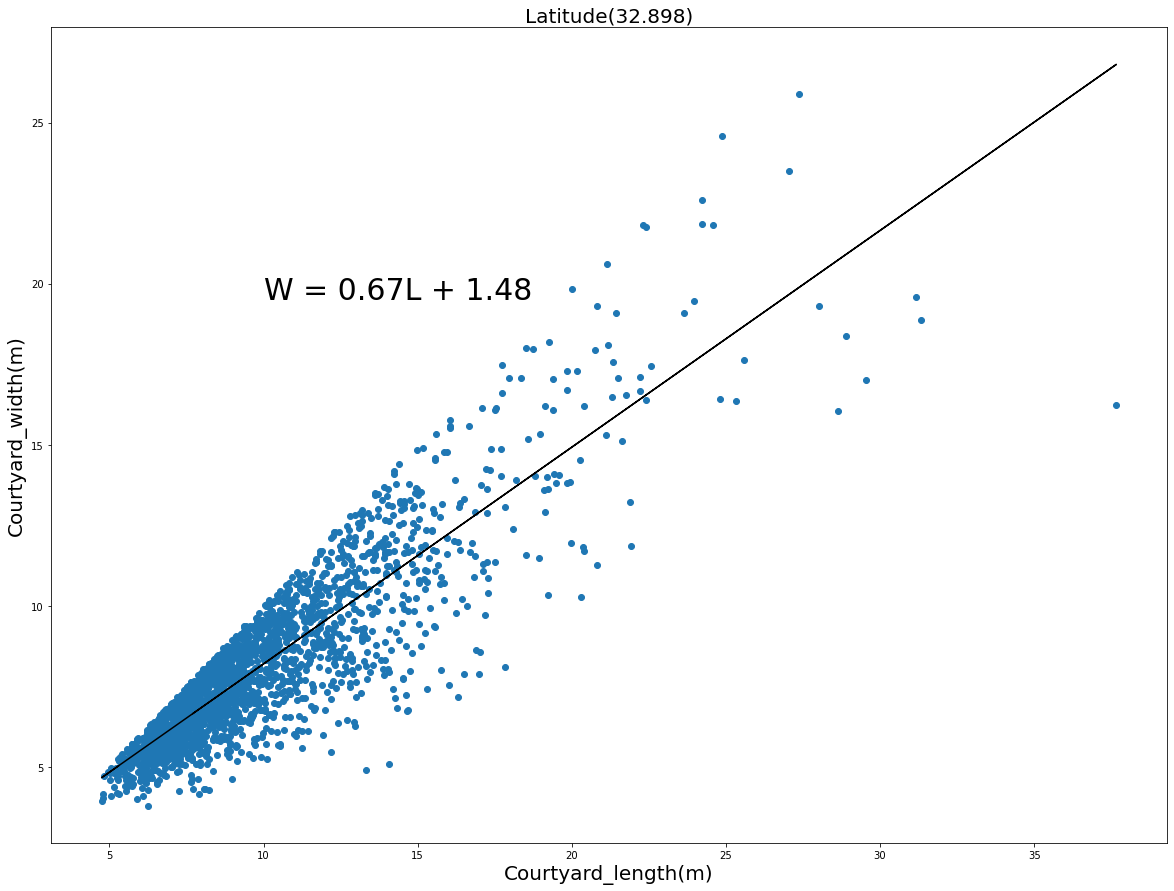

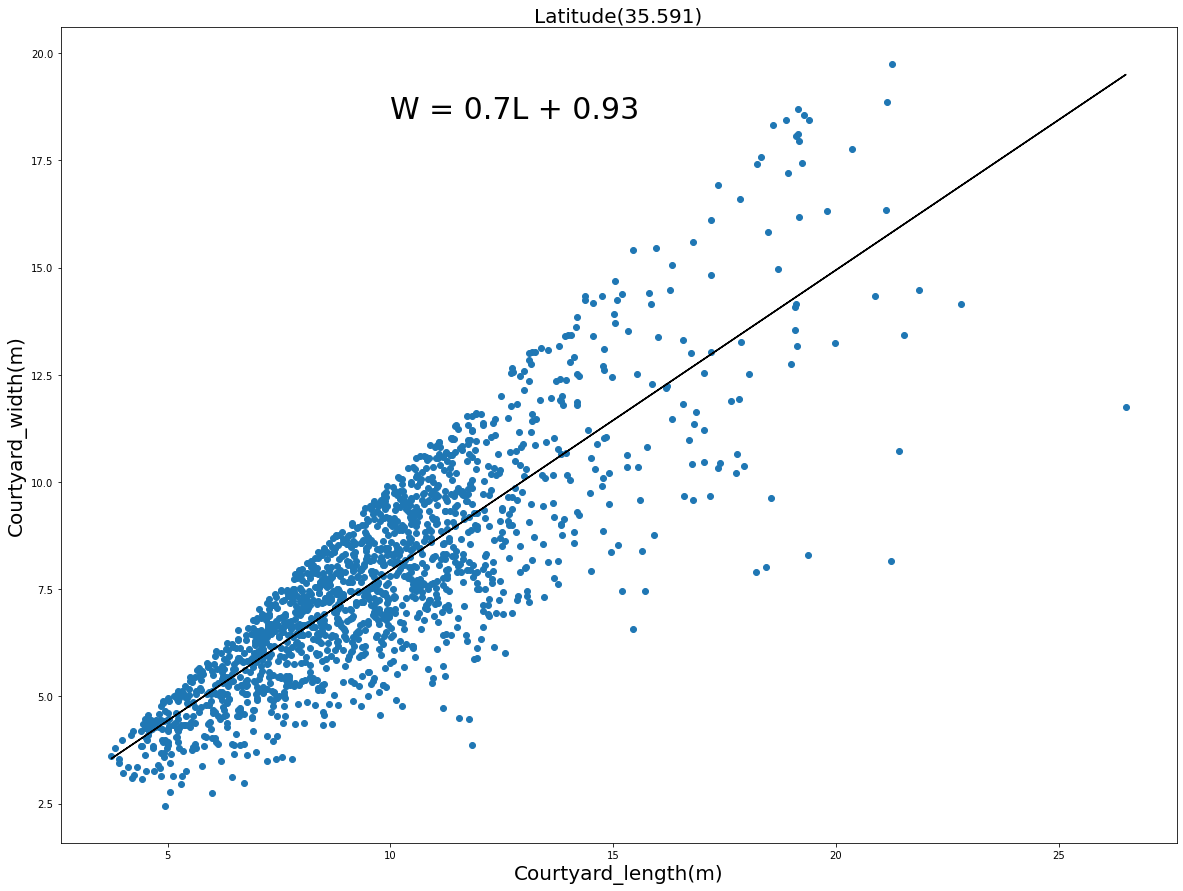

In [61]:
Latitude = [26.532,28.945,29.539,31.183,31.905,32.751,32.898,35.591]

regressor = LinearRegression()
for i in Latitude:
    X = df_2[df_2.latitude == i]['Courtyard_length(m)'].values.reshape(-1, 1)
    y = df_2[df_2.latitude == i]['Courtyard_width(m)'].values.reshape(-1, 1)
    
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    plt.figure(figsize=[20,15])
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='k')
    plt.text(x=10, y =df_2[df_2.latitude == i].describe()['Courtyard_width(m)']['mean']*2.4 , s=f"W = {round(regressor.coef_[0][0], 2)}L + {round(regressor.intercept_[0], 2)}" , fontdict=dict(fontsize=30))
    plt.xlabel('Courtyard_length(m)', fontdict=dict(fontsize=20))
    plt.ylabel('Courtyard_width(m)', fontdict=dict(fontsize=20))
    plt.title(f'Latitude({i})', fontdict=dict(fontsize=20))
    plt.show()

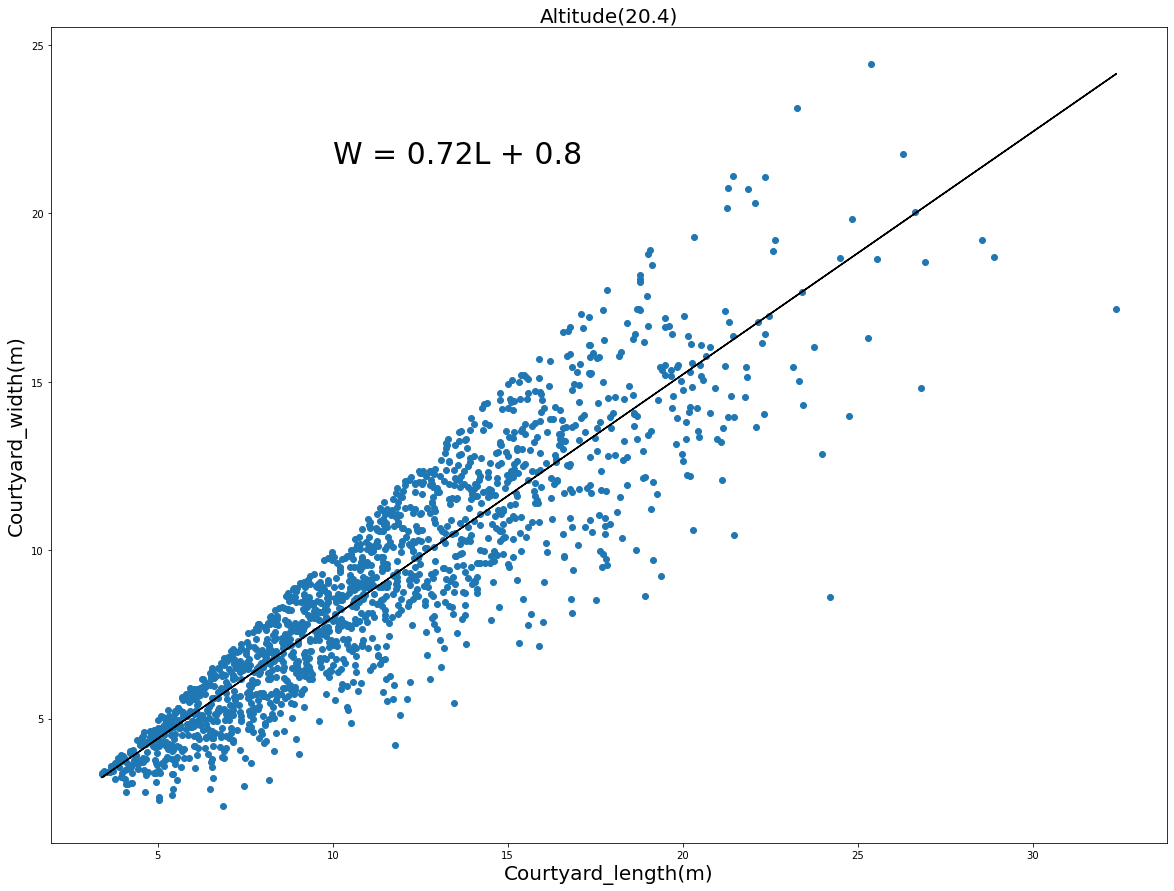

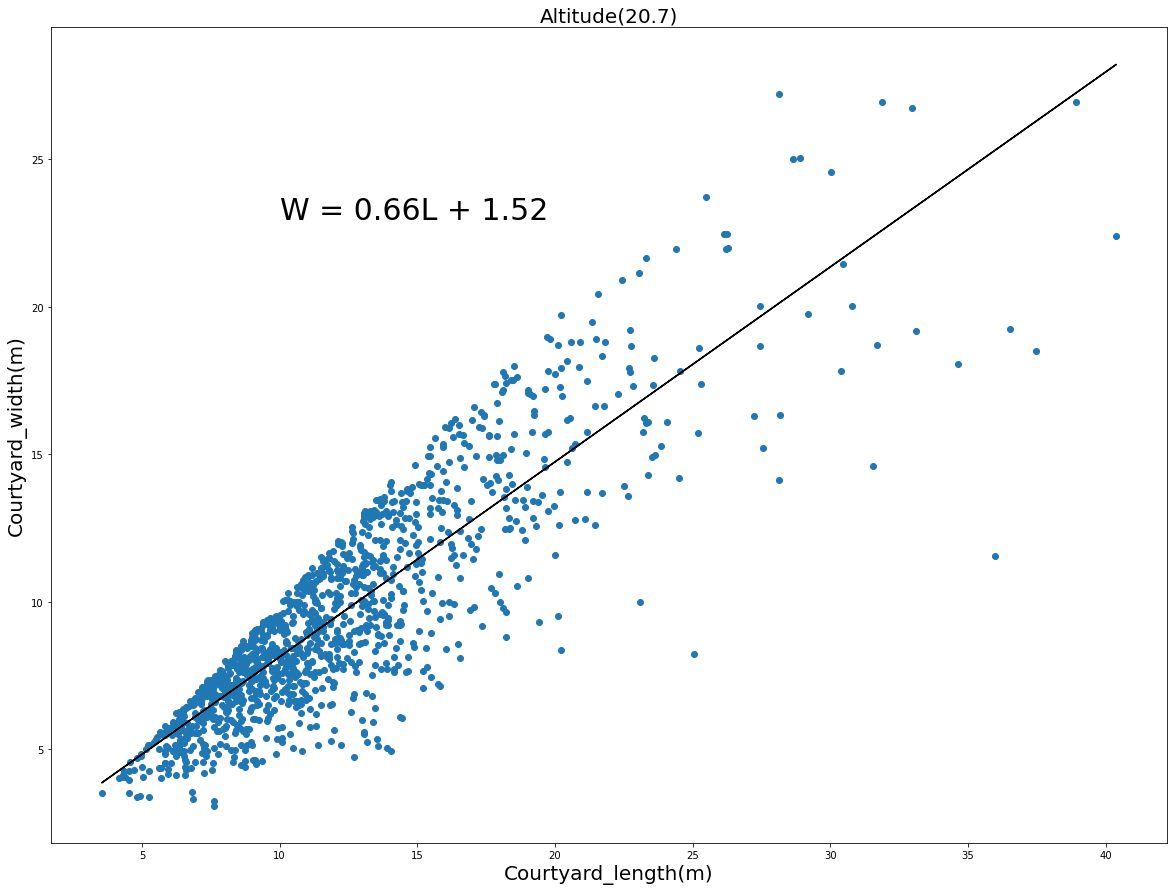

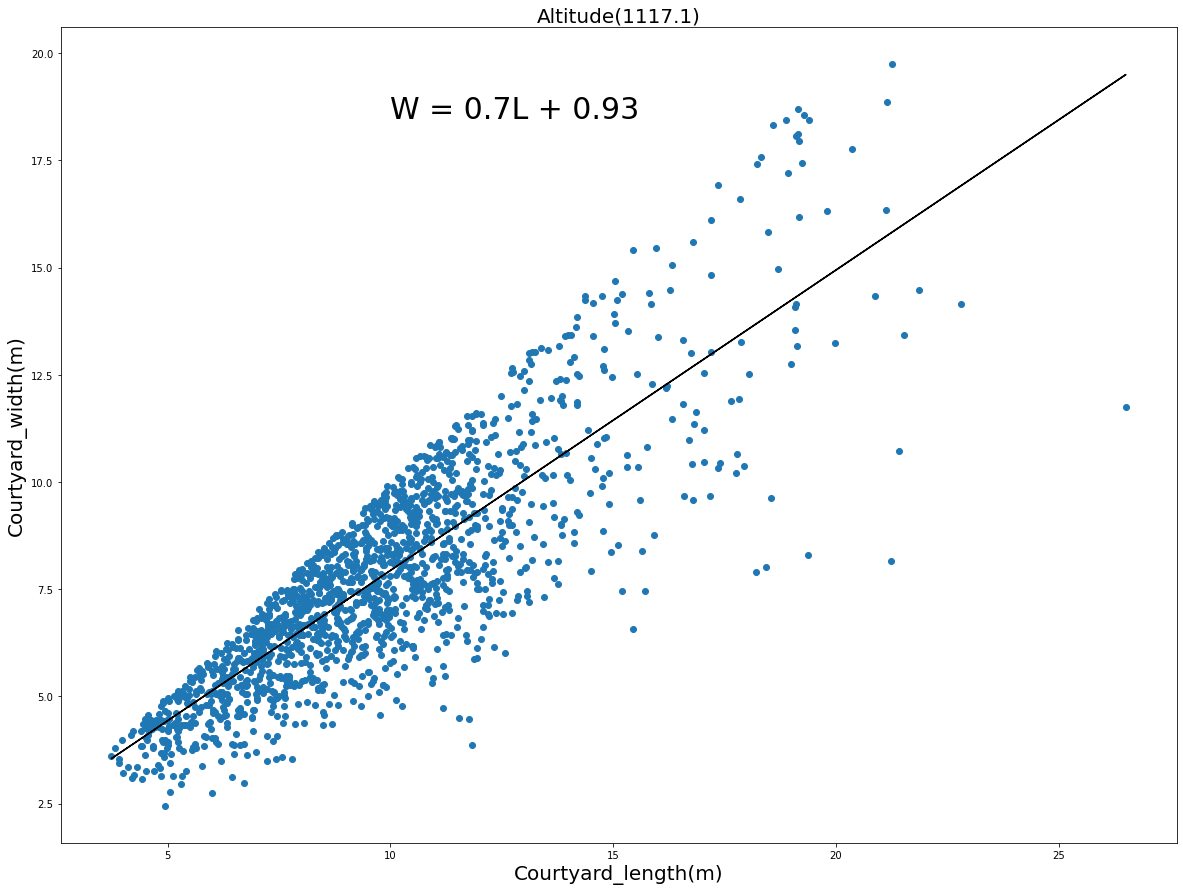

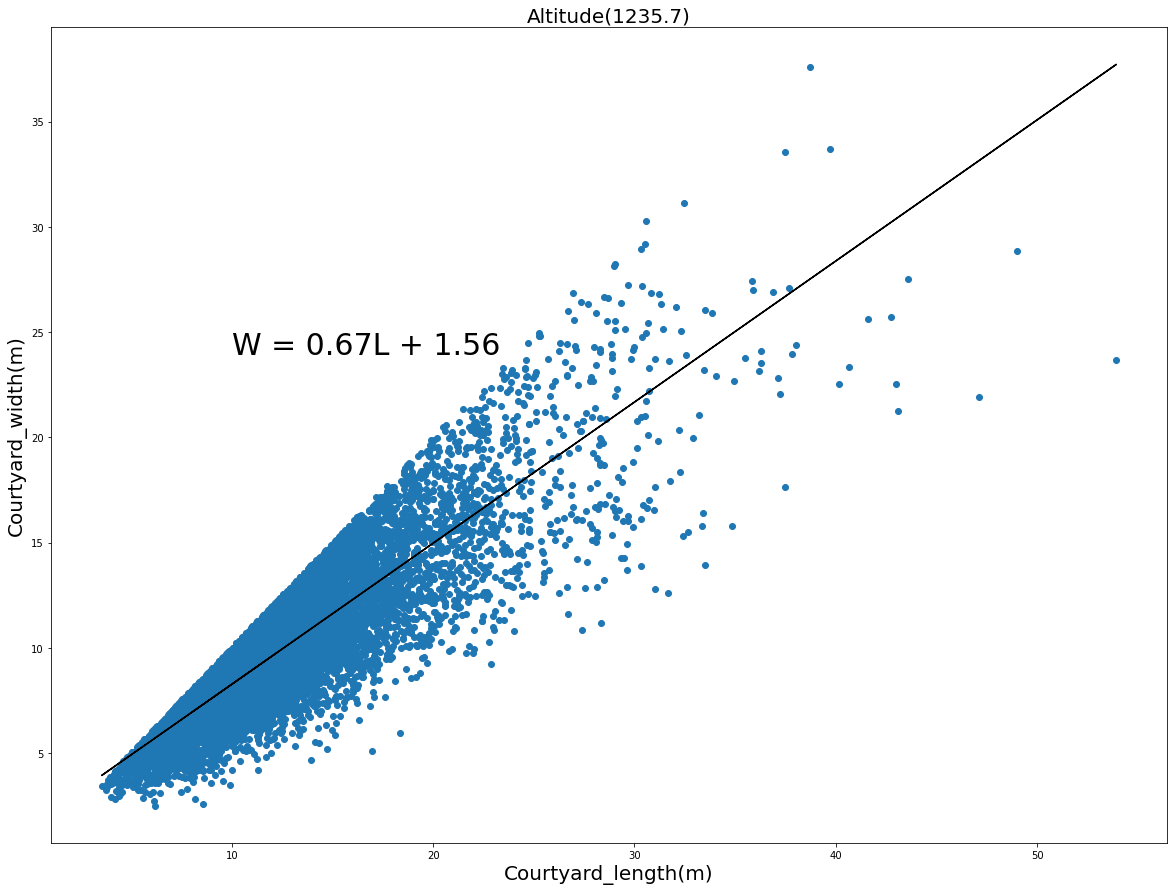

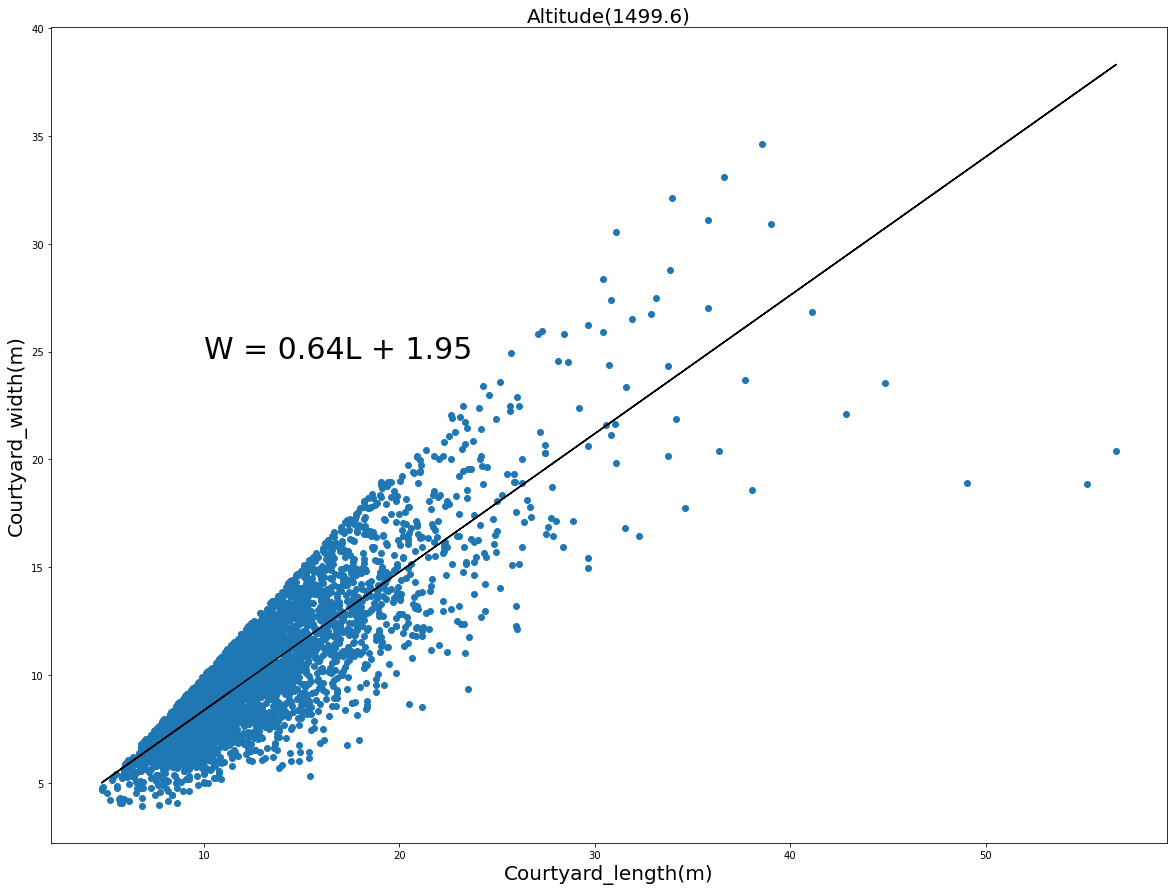

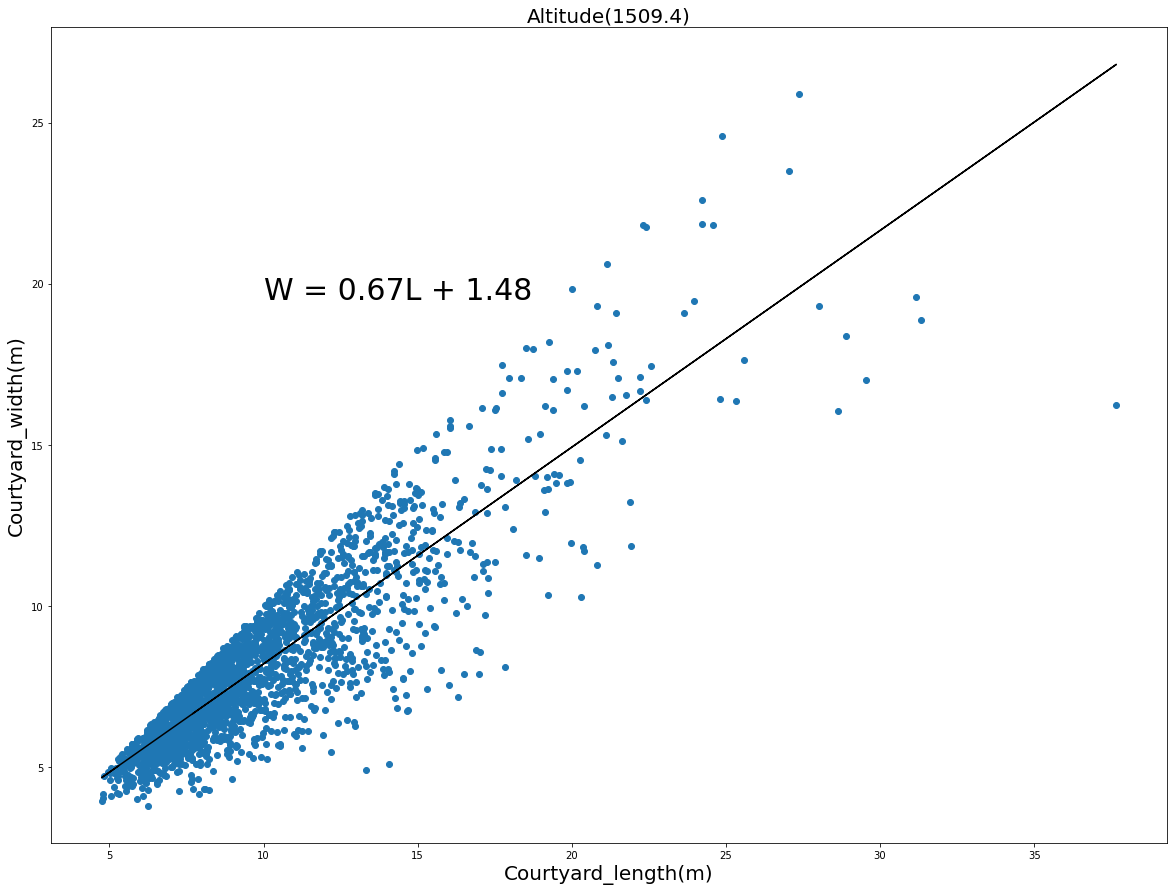

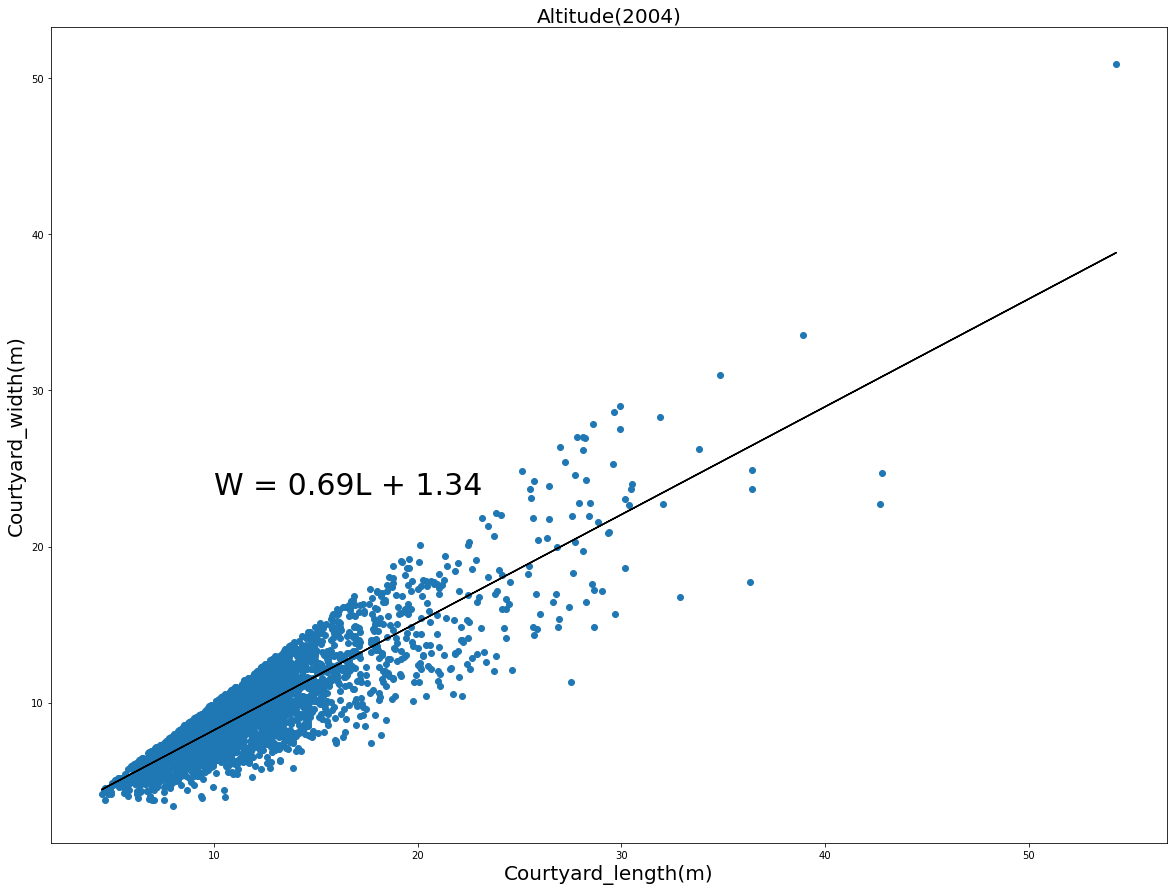

In [62]:
Altitude = [20.4,20.7,1117.1,1235.7,1499.6,1509.4,2004]

regressor = LinearRegression()
for i in Altitude:
    X = df_2[df_2.altitude == i]['Courtyard_length(m)'].values.reshape(-1, 1)
    y = df_2[df_2.altitude == i]['Courtyard_width(m)'].values.reshape(-1, 1)
    
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    plt.figure(figsize=[20,15])
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='k')
    plt.text(x=10, y =df_2[df_2.altitude == i].describe()['Courtyard_width(m)']['mean']*2.4 , s=f"W = {round(regressor.coef_[0][0], 2)}L + {round(regressor.intercept_[0], 2)}" , fontdict=dict(fontsize=30))
    plt.xlabel('Courtyard_length(m)', fontdict=dict(fontsize=20))
    plt.ylabel('Courtyard_width(m)', fontdict=dict(fontsize=20))
    plt.title(f'Altitude({i})', fontdict=dict(fontsize=20))
    plt.show()

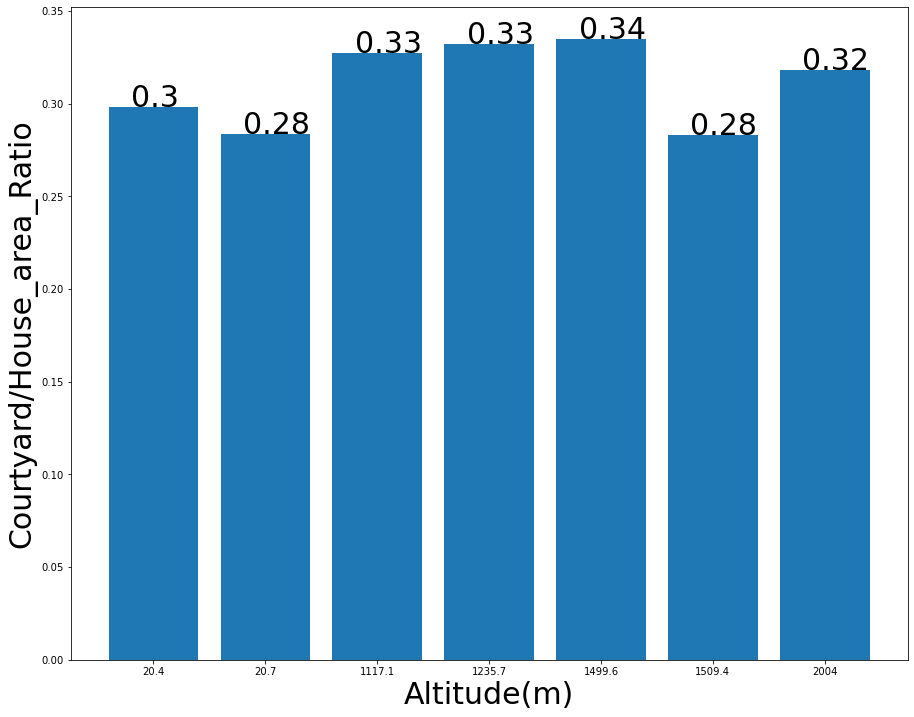

In [7]:
Altitude = [20.4,20.7,1117.1,1235.7,1499.6,1509.4,2004]
x = ['20.4','20.7','1117.1','1235.7','1499.6','1509.4','2004']
y = []
for i in Altitude:
    y.append(df_2[df_2.altitude == i].describe()['Courtyard/House_area_Ratio']['mean'])

plt.figure(figsize=[15,12])
plt.bar(x, y)
plt.xlabel('Altitude(m)', fontdict=dict(fontsize=30))
plt.ylabel('Courtyard/House_area_Ratio', fontdict=dict(fontsize=30))
for index,data in enumerate(y):
    plt.text(x=index-0.2, y =data , s=f"{round(data, 2)}" , fontdict=dict(fontsize=30))

# plt.grid()
# plt.title('Scatter plot of the length and width of the courtyards')
plt.show()

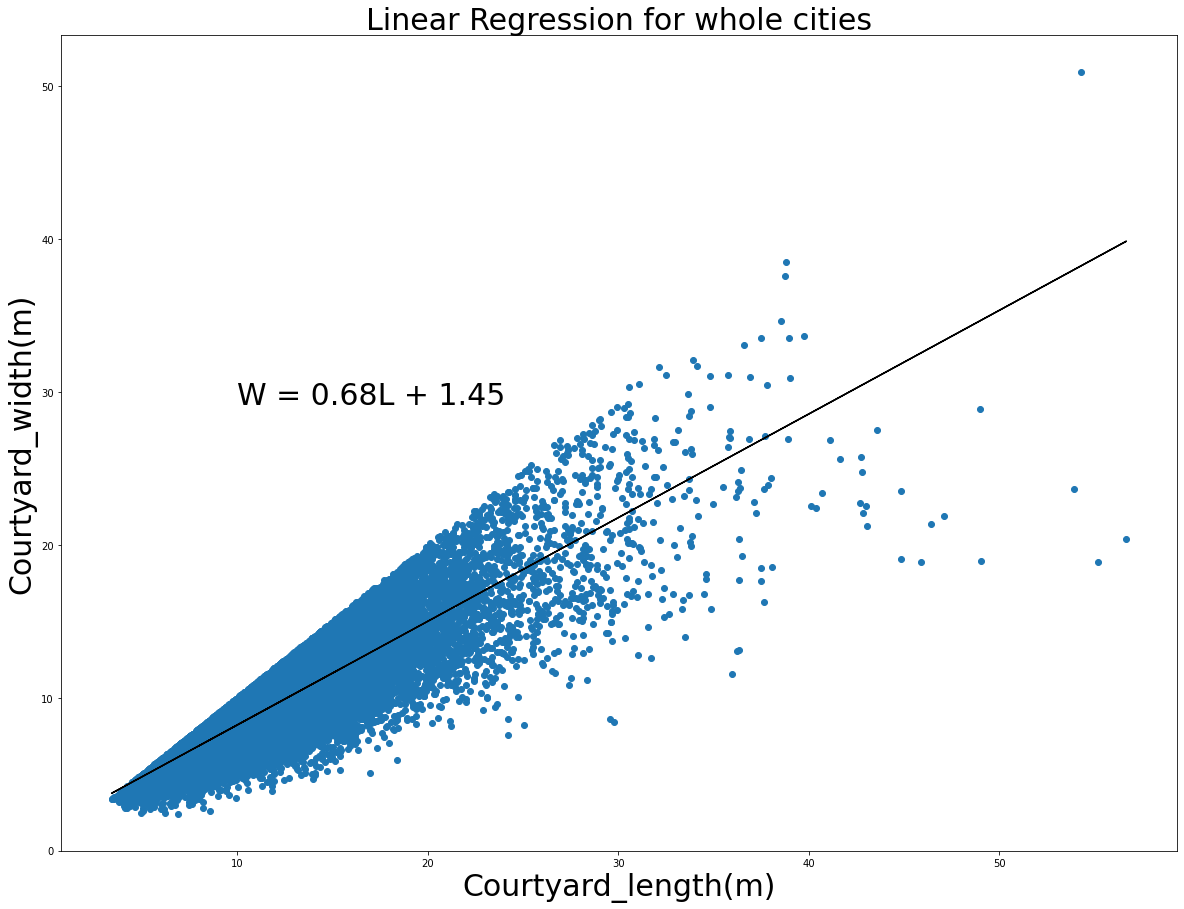

In [8]:
regressor = LinearRegression()

X = df_2['Courtyard_length(m)'].values.reshape(-1, 1)
y = df_2['Courtyard_width(m)'].values.reshape(-1, 1)

regressor.fit(X, y)
y_pred = regressor.predict(X)
plt.figure(figsize=[20,15])
plt.scatter(X, y)
plt.plot(X, y_pred, color='k')
plt.text(x=10, y =df_2.describe()['Courtyard_width(m)']['mean']*3 , s=f"W = {round(regressor.coef_[0][0], 2)}L + {round(regressor.intercept_[0], 2)}" , fontdict=dict(fontsize=30))
plt.xlabel('Courtyard_length(m)', fontdict=dict(fontsize=30))
plt.ylabel('Courtyard_width(m)', fontdict=dict(fontsize=30))
plt.title('Linear Regression for whole cities', fontdict=dict(fontsize=30))
plt.show()